# Bank Marketing Project

### Project Overview

The Bank Marketing project utilizes data from a Portuguese bank's direct marketing campaigns. These campaigns involved phone calls to clients, aiming to persuade them to subscribe to a term deposit (a type of savings account). The primary goal of this project is to analyze customer data and predict whether a client will subscribe to the term deposit or not.



### Dataset Description

The dataset used in this project is sourced from the UCI Machine Learning Repository. It contains historical data collected from May 2008 to November 2010 through direct phone marketing campaigns conducted by a Portuguese banking institution.

**Key Details:**

- **Number of Records:** 45,211
- **Number of Features (variables):** 16 input features + 1 target variable
- **Missing Values:** None
- **Data Type:** Multivariate (multiple variables), consisting of categorical (text-based) and numerical (integer) data types



### Objective of the Project

The main objective is to use machine learning techniques to predict whether a customer will subscribe ("yes") or not subscribe ("no") to the bank's term deposit product based on their personal information and interaction history with the bank.


### Data Variables Explained

Below is an explanation of each variable in the dataset:

| Variable Name | Description | Type |
|---------------|-------------|------|
| **age** | Age of the client | Numeric |
| **job** | Client’s occupation type (e.g., admin, technician, student, retired) | Categorical |
| **marital** | Marital status (married, divorced/widowed, single) | Categorical |
| **education** | Education level (primary, secondary, tertiary, unknown) | Categorical |
| **default** | Whether the client has credit in default (yes/no) | Binary |
| **balance** | Average yearly balance in euros | Numeric |
| **housing** | Whether the client has a housing loan (yes/no) | Binary |
| **loan** | Whether the client has a personal loan (yes/no) | Binary |
| **contact** | Communication type used for contact (cellular/telephone/unknown) | Categorical |
| **day** | Last contact day of the month (numeric) | Numeric |
| **month** | Last contact month of the year (jan-dec) | Categorical |
| **duration** | Duration of last contact in seconds | Numeric |
| **campaign** | Number of contacts made during this campaign for this client | Numeric |
| **pdays** | Days passed since last contact from previous campaign (-1 means never previously contacted) | Numeric |
| **previous** | Number of contacts performed before this campaign for this client | Numeric |
| **poutcome** | Outcome of previous marketing campaign (success/failure/other/unknown) | Categorical |

### Target Variable:
- **y:** Indicates whether the client subscribed to a term deposit ("yes" or "no").



### Loading Dataset

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
print('\nDataset Information:\n')
data.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
print('\nSummary Statistics:\n')
data.describe()


Summary Statistics:



,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- **Age:**
  - Mean: 40.94 years
  - Std Dev: 10.62 years
  - Range: 18 to 95 years
  - 25% of clients are below 33 years, 50% below 39 years, and 75% below 48 years.

- **Balance:**
  - Mean: 1362.27 euros
  - Std Dev: 3044.77 euros
  - Range: -8019 to 102127 euros
  - 25% of clients have balances below 72 euros, 50% below 448 euros, and 75% below 1428 euros.

- **Day:**
  - Mean: 15.81 (day of the month)
  - Std Dev: 8.32
  - Range: 1 to 31
  - 25% of contacts occur before the 8th, 50% before the 16th, and 75% before the 21st.

- **Duration:**
  - Mean: 258.16 seconds
  - Std Dev: 257.53 seconds
  - Range: 0 to 4918 seconds
  - 25% of calls last less than 103 seconds, 50% less than 180 seconds, and 75% less than 319 seconds.

- **Campaign:**
  - Mean: 2.76 contacts
  - Std Dev: 3.10 contacts
  - Range: 1 to 63 contacts
  - 25% of clients were contacted once, 50% twice, and 75% three times.

- **Pdays:**
  - Mean: 40.20 days since last contact
  - Std Dev: 100.13 days
  - Range: -1 to 871 days
  - 25%, 50%, and 75% of clients have `pdays=-1`, indicating they were not previously contacted.

- **Previous:**
  - Mean: 0.58 contacts
  - Std Dev: 2.30 contacts
  - Range: 0 to 275 contacts
  - 25%, 50%, and 75% of clients have 0 previous contacts, indicating many clients were not contacted before.

**Checking Missing values:**

In [5]:
print('\nMissing Values Count:\n')
print(data.isnull().sum())


Missing Values Count:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


<Axes: >

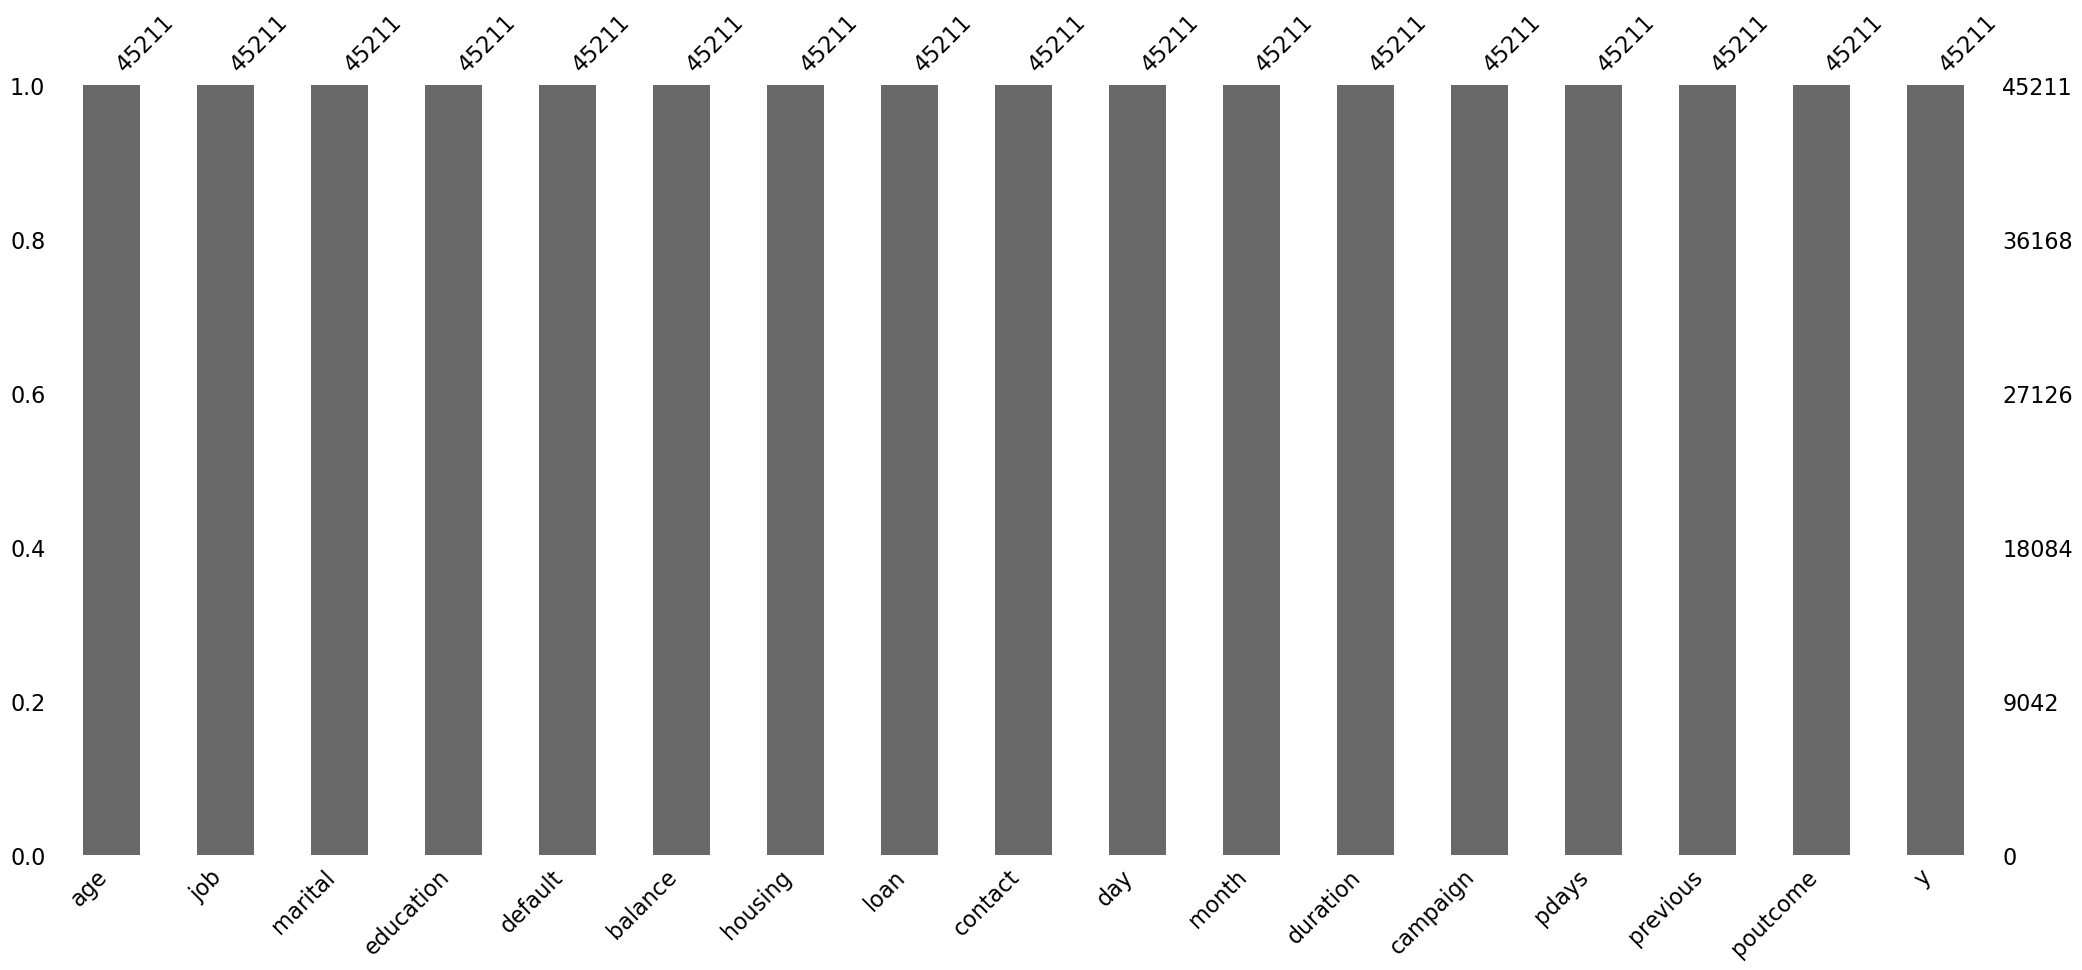

In [6]:
msno.bar(data)

- **No Missing Values:** The dataset is complete, with no missing values in any of the features or the target variable (`y`).
- **Implications:** 
  - No need for imputation or handling of missing data.
  - The dataset is ready for analysis and modeling without preprocessing for missing values.

**Checking for duplicate values**

In [7]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicate rows if any
if duplicate_rows > 0:
    display(data[data.duplicated()])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


- **No Duplicate Rows:** The dataset contains no duplicate rows.
- **Implications:** 
  - The dataset is clean and does not require deduplication.
  - All rows are unique, ensuring no redundancy in the data for analysis or modeling.

**Handling Outliers**

- **Cheking Outliers for Age:**

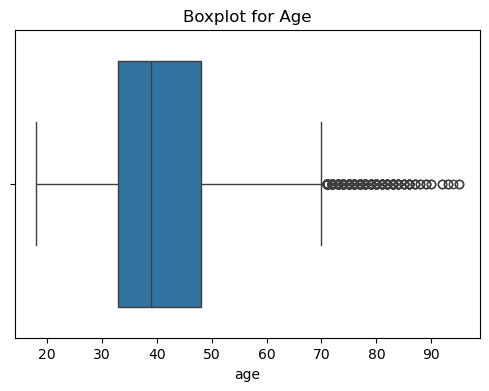

Number of outliers in 'age': 487


In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['age'])
plt.title("Boxplot for Age")
plt.show()

# IQR method to detect outliers in 'age'
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

print(f"Number of outliers in 'age': {outliers_age.shape[0]}")

- **Age Distribution:** The boxplot shows the distribution of client ages.
  - The median age is around 40 years.
  - The interquartile range (IQR) spans from approximately 33 to 48 years.
  - There are some outliers, particularly in the higher age range (above 60 years).
- **Key Insight:** The majority of clients are middle-aged (30-50 years), with fewer clients in the younger (below 30) and older (above 60) age groups.

In [9]:
multipliers = [1.0, 1.5, 2.0, 3.0]

# Compute Q1 and Q3
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Check outliers for different multipliers
for m in multipliers:
    lower_bound = Q1 - m * IQR
    upper_bound = Q3 + m * IQR
    outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
    
    print(f"Multiplier {m}: Number of outliers in 'age' = {outliers.shape[0]}")


Multiplier 1.0: Number of outliers in 'age' = 884
Multiplier 1.5: Number of outliers in 'age' = 487
Multiplier 2.0: Number of outliers in 'age' = 155
Multiplier 3.0: Number of outliers in 'age' = 3


- **Multiplier 1.0:** 884 outliers detected.
- **Multiplier 1.5:** 487 outliers detected.
- **Multiplier 2.0:** 155 outliers detected.
- **Multiplier 3.0:** 3 outliers detected.
- **Outlier Range:** Calculated using:
  - `lower_bound = Q1 - 1.5 * IQR`
  - `upper_bound = Q3 + 1.5 * IQR`

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_trimmed = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

print(f"Data shape after trimming: {data_trimmed.shape}")


Data shape after trimming: (44724, 17)


- **Data Shape After Trimming:** (44724, 17)
- **Insight:** Trimming removes rows with outliers, reducing the dataset size from 45,211 to 44,724 rows.

In [11]:
# Capping outliers
data_capped = data.copy()
data_capped['age'] = data['age'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print(f"Age column after capping:\n{data_capped['age'].describe()}")


Age column after capping:
count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64


- **Age Column After Capping:**
  - **Count:** 45,211 (no rows removed).
  - **Mean:** 40.87 years (slightly lower than the original mean of 40.94).
  - **Std Dev:** 10.39 (reduced from 10.62, indicating less variability).
  - **Min:** 18 years (unchanged).
  - **Max:** 70.5 years (capped from the original max of 95 years).
- **Insight:** Capping replaces extreme values with the lower and upper bounds, preserving the dataset size while reducing the impact of outliers.

In [12]:
data['age_log'] = np.log1p(data['age'])

# Box-Cox transformation (requires positive values)
from scipy.stats import boxcox
data['age_boxcox'], _ = boxcox(data['age'] + 1)

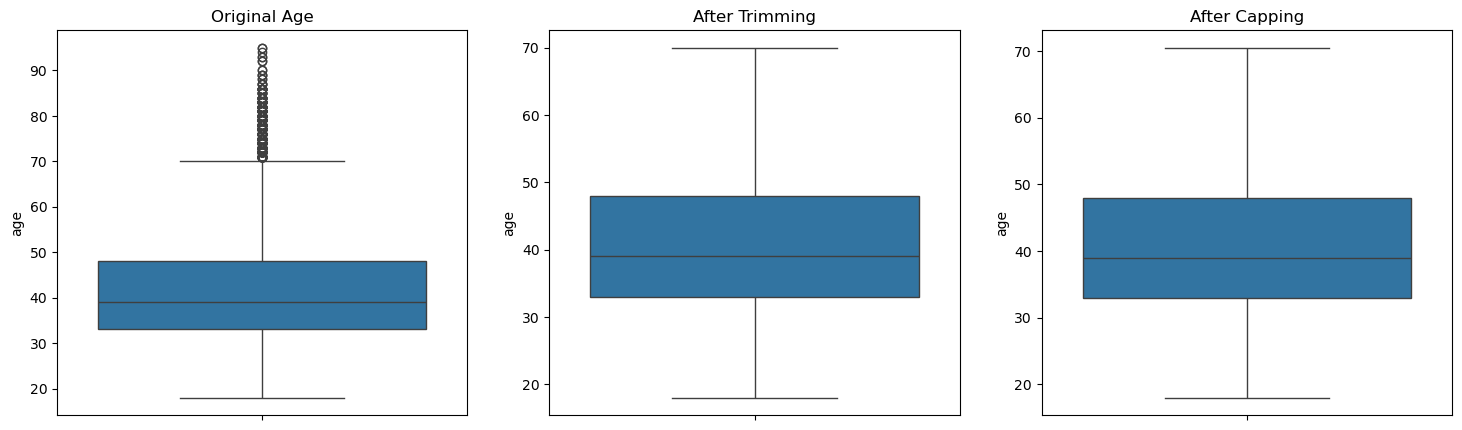

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data['age'], ax=axes[0])
axes[0].set_title("Original Age")

sns.boxplot(data_trimmed['age'], ax=axes[1])
axes[1].set_title("After Trimming")

sns.boxplot(data_capped['age'], ax=axes[2])
axes[2].set_title("After Capping")

plt.show()

**Original Age:**
- **Age Range:** 20 to 90 years.
- **Distribution:** The original age distribution includes a wide range, with some extreme values (e.g., ages above 70).

**After Trimming:**
- **Age Range:** 20 to 70 years.
- **Distribution:** Outliers (e.g., ages above 70) have been removed, resulting in a more compact distribution.

**After Capping:**
- **Age Range:** 20 to 70 years.
- **Distribution:** Extreme values (e.g., ages above 70) have been capped at 70, preserving the dataset size while reducing the impact of outliers.

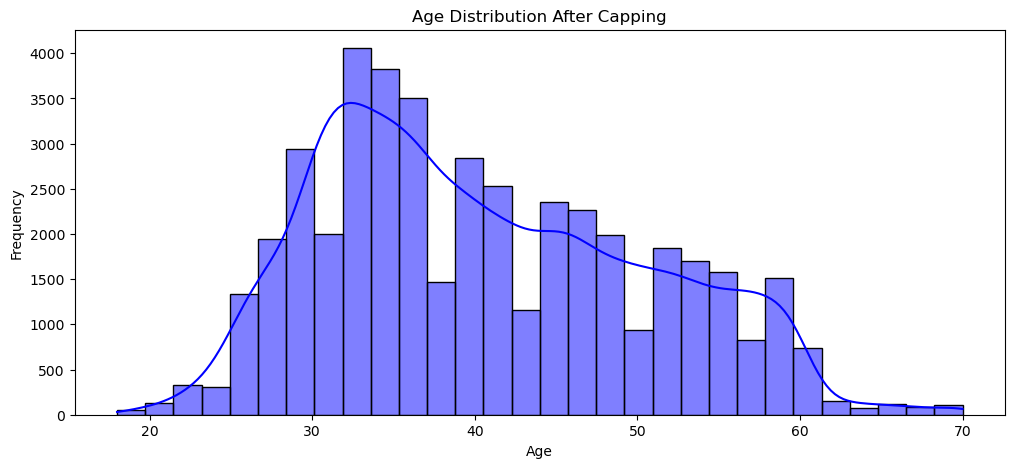

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(data_trimmed['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution After Capping")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- **Frequency:** The highest frequency of clients is observed in the 30-50 age range.
- **Age Range:** The age distribution is now capped at 70 years, with no values exceeding this limit.
- **Key Insight:** The distribution is more compact and less skewed after capping, making it more suitable for analysis and modeling.

**Using Capping Instead of Trimming ✅**

Reason:

- Capping keeps all data points while limiting extreme values, preventing loss of potentially useful information.
- Trimming removes data, which could lead to information loss, especially if the outliers hold meaningful insights (e.g., older clients might behave differently in banking).
- Boxplots and summary statistics showed that after capping, the age distribution looks reasonable, making it a safer choice.

**Proceeding with Capping in the Actual Data**
  
Let's now apply capping to the original dataset and replace the age column with the capped values.

In [15]:
# Apply capping to the original data
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  # 1.5 IQR rule
upper_bound = Q3 + 1.5 * IQR

# Replace extreme values with lower/upper bound
data['age'] = data['age'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Verify changes
print(data['age'].describe())


count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64


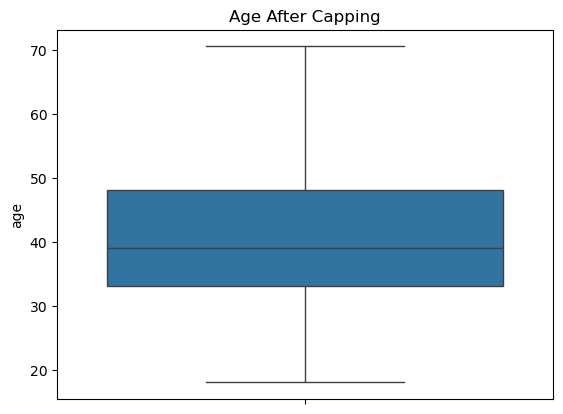

In [16]:
sns.boxplot(data['age'])
plt.title("Age After Capping")
plt.show()

- **Age Range:** The age values are now capped at 70 years.
- **Distribution:** The distribution shows a concentration of clients in the 30-50 age range, with fewer clients in the younger (20-30) and older (60-70) age groups.
- **Key Insight:** Capping has effectively reduced the impact of extreme values while preserving the overall distribution shape.

- **Checking Outliers for 'balance'**

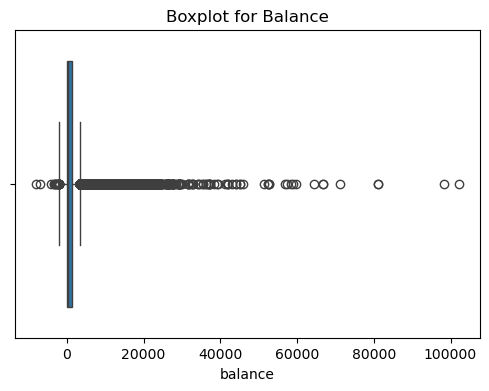

Number of outliers in 'balance': 4729


In [17]:
# Boxplot for 'balance'
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['balance'])
plt.title("Boxplot for Balance")
plt.show()

# IQR method for 'balance'
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_balance = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]

print(f"Number of outliers in 'balance': {outliers_balance.shape[0]}")


- **Balance Range:** The boxplot shows a wide range of balance values, from 0 to 100,000 euros.
- **Outliers:** There are significant outliers in the higher balance range (above 20,000 euros).
- **Key Insight:** The majority of clients have balances below 20,000 euros, with a few extreme outliers. This suggests that the balance feature is highly skewed and may require transformation or outlier handling for better analysis.

**Check Outliers at Multiple Quantile Ranges**

In [18]:
# Define different multipliers for IQR
multipliers = [1.0, 1.5, 2.0, 3.0]

# Compute Q1 and Q3
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

# Check outliers for different multipliers
for m in multipliers:
    lower_bound = Q1 - m * IQR
    upper_bound = Q3 + m * IQR
    outliers = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]
    
    print(f"Multiplier {m}: Number of outliers in 'balance' = {outliers.shape[0]}")


Multiplier 1.0: Number of outliers in 'balance' = 6188
Multiplier 1.5: Number of outliers in 'balance' = 4729
Multiplier 2.0: Number of outliers in 'balance' = 3735
Multiplier 3.0: Number of outliers in 'balance' = 2443


- The number of outliers decreases as the multiplier increases, with 2443 outliers remaining at a multiplier of 3.0.
- Outliers are identified using the IQR method, with bounds calculated as:
  - `lower_bound = Q1 - 1.5 * IQR`
  - `upper_bound = Q3 + 1.5 * IQR`

**Choosing the Best Approach for Handling Outliers**

1️⃣ Trimming (Removing Outliers)

In [19]:
# Apply trimming
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_trimmed = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

print(f"Data shape after trimming: {data_trimmed.shape}")


Data shape after trimming: (40482, 19)


- Trimming removes 4729 rows, reducing the dataset size from 45,211 to 40,482 rows.
- This approach eliminates extreme values but may lead to loss of valuable data.

2️⃣ Capping (Replacing Outliers with Boundaries)


In [20]:
# Apply capping
data_capped = data.copy()
data_capped['balance'] = data['balance'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print(data_capped['balance'].describe())


count    45211.000000
mean       933.706974
std       1176.765369
min      -1962.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max       3462.000000
Name: balance, dtype: float64


- Capping replaces extreme values with the lower and upper bounds, preserving the dataset size.
- After capping:
  - Mean balance decreases to 933.71 euros (from 1362.27 euros).
  - Standard deviation reduces to 1176.77 (from 3044.77).
  - Maximum balance is capped at 3462 euros (from 102,127 euros).

3️⃣ Transformation (Log/Box-Cox

In [21]:
from scipy.stats import boxcox

# Find the minimum value in balance
min_balance = data['balance'].min()

# Shift balance to be positive
shift_value = abs(min_balance) + 1  # Make the minimum value > 0
data['balance_shifted'] = data['balance'] + shift_value  # Shifted balance column

# Apply Box-Cox transformation
data['balance_boxcox'], lambda_param = boxcox(data['balance_shifted'])

# Print the lambda parameter
print(f"Box-Cox Lambda: {lambda_param}")


Box-Cox Lambda: -0.03986976494828618


- The balance values are shifted to ensure all values are positive before applying the Box-Cox transformation.
- The Box-Cox lambda parameter is -0.0399, indicating the optimal transformation.
- The transformation reduces skewness and normalizes the distribution, making it more suitable for modeling.

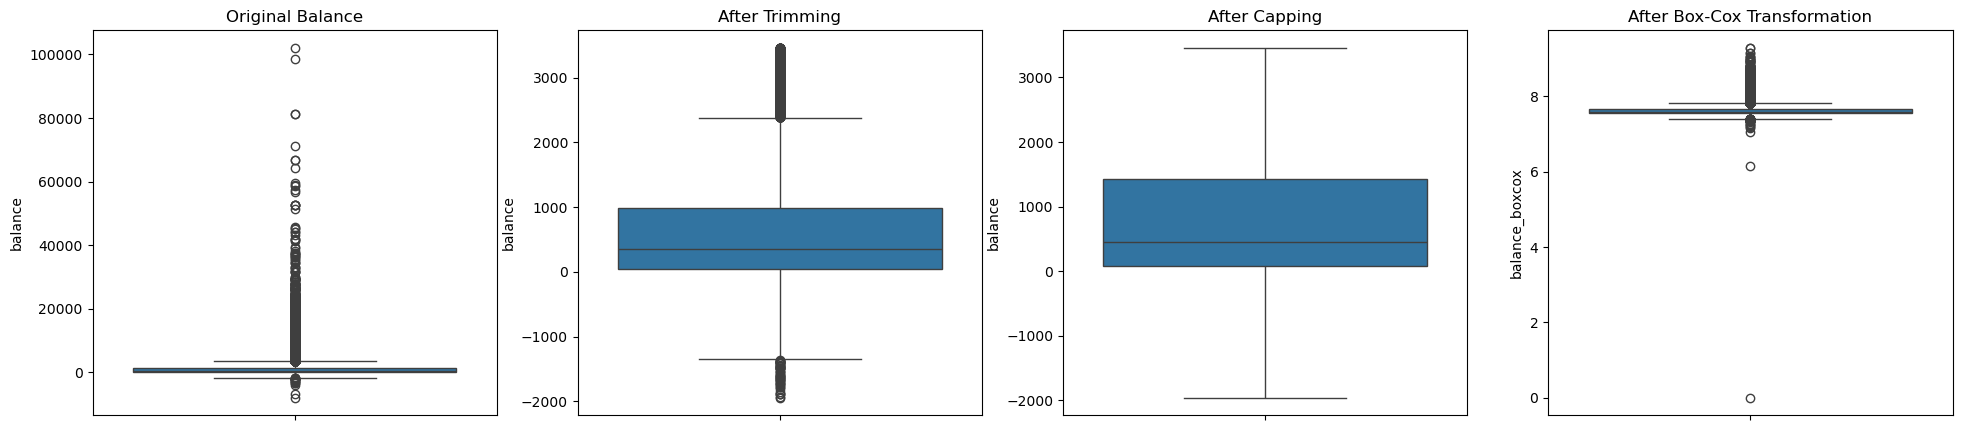

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Original balance
sns.boxplot(data['balance'], ax=axes[0])
axes[0].set_title("Original Balance")

# After Trimming
sns.boxplot(data_trimmed['balance'], ax=axes[1])
axes[1].set_title("After Trimming")

# After Capping
sns.boxplot(data_capped['balance'], ax=axes[2])
axes[2].set_title("After Capping")

# After Box-Cox Transformation
sns.boxplot(data['balance_boxcox'], ax=axes[3])
axes[3].set_title("After Box-Cox Transformation")

plt.show()


**Original Balance:**
- The original balance distribution has a wide range, with extreme values up to 100,000 euros.
- The distribution is highly skewed, with most values concentrated below 20,000 euros.

**After Trimming:**
- Trimming removes extreme values, resulting in a more compact range.
- The distribution is less skewed, but the dataset size is reduced.

**After Capping:**
- Capping replaces extreme values with the lower and upper bounds, preserving the dataset size.
- The balance range is now between -2000 and 3000 euros, reducing the impact of outliers.

**After Box-Cox Transformation:**
- The Box-Cox transformation reduces skewness and normalizes the distribution.
- The transformed balance values (`balance_boxcox`) are more suitable for modeling.

In [23]:
# Compute IQR for balance
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds using 1.5 IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
data['balance'] = data['balance'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Verify the changes
print(data['balance'].describe())


count    45211.000000
mean       933.706974
std       1176.765369
min      -1962.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max       3462.000000
Name: balance, dtype: float64


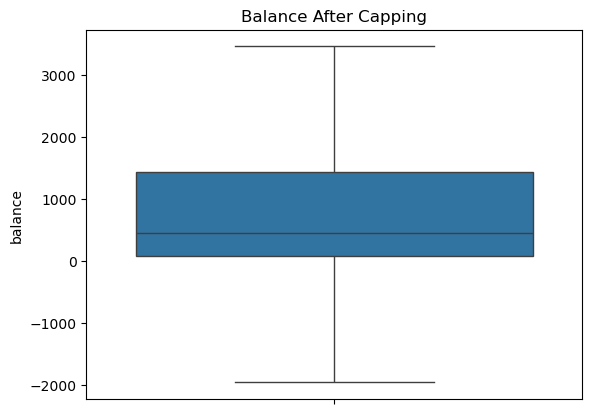

In [24]:
sns.boxplot(data['balance'])
plt.title("Balance After Capping")
plt.show()

- Outliers have been capped at the lower and upper bounds, preserving the dataset size.
- The balance range is now constrained, and extreme values no longer skew the distribution.

**Checking Outliers for 'duration'**

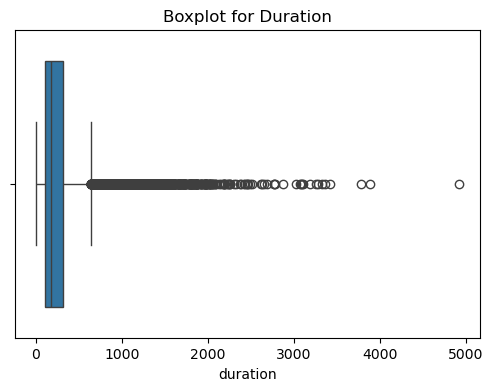

Number of outliers in 'duration': 3235


In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['duration'])
plt.title("Boxplot for Duration")
plt.show()

# IQR method for 'duration'
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_duration = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]

print(f"Number of outliers in 'duration': {outliers_duration.shape[0]}")


- The boxplot shows the distribution of call durations, ranging from 0 to 5000 seconds.
- Most call durations are concentrated below 1000 seconds, with some outliers extending up to 5000 seconds.
- The presence of outliers indicates that some calls are significantly longer than the majority.
- Handling these outliers (e.g., trimming, capping, or transformation) may be necessary for better analysis and modeling.

**Checking Outliers at Different IQR Multipliers**

In [26]:
multipliers = [1.0, 1.5, 2.0, 3.0]

# Compute Q1 and Q3 for duration
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

# Check outliers for different multipliers
for m in multipliers:
    lower_bound = Q1 - m * IQR
    upper_bound = Q3 + m * IQR
    outliers = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]
    
    print(f"Multiplier {m}: Number of outliers in 'duration' = {outliers.shape[0]}")


Multiplier 1.0: Number of outliers in 'duration' = 4718
Multiplier 1.5: Number of outliers in 'duration' = 3235
Multiplier 2.0: Number of outliers in 'duration' = 2258
Multiplier 3.0: Number of outliers in 'duration' = 1155


- Multiplier 1.0: 4718 outliers detected.
- Multiplier 1.5: 3235 outliers detected.
- Multiplier 2.0: 2258 outliers detected.
- Multiplier 3.0: 1155 outliers detected.
- Outlier bounds calculated using:
  - `lower_bound = Q1 - m * IQR`
  - `upper_bound = Q3 + m * IQR`

1️⃣ Trimming (Removing Outliers)

In [27]:
# Apply trimming
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_trimmed = data[(data['duration'] >= lower_bound) & (data['duration'] <= upper_bound)]

print(f"Data shape after trimming: {data_trimmed.shape}")


Data shape after trimming: (41976, 21)


- Dataset size reduced from 45,211 to 41,976 rows.
- 3235 rows removed, eliminating extreme values.

2️⃣ Capping (Replacing Outliers with Boundaries)

In [28]:
# Apply capping
data_capped = data.copy()
data_capped['duration'] = data['duration'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print(data_capped['duration'].describe())


count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: duration, dtype: float64


- Dataset size remains 45,211 rows.
- Duration values capped at 643 seconds (from the original max of 4918 seconds).
- Mean duration reduced to 234.94 seconds (from 258.16 seconds).
- Standard deviation reduced to 176.75 (from 257.53).

3️⃣ Transformation (Log/Box-Cox)

In [29]:
data['duration_log'] = np.log1p(data['duration'])

# Box-Cox transformation (requires positive values)
from scipy.stats import boxcox
data['duration_boxcox'], lambda_param = boxcox(data['duration'] + 1)

print(f"Box-Cox Lambda: {lambda_param}")


Box-Cox Lambda: 0.1343717803929827


- Log transformation applied using `np.log1p` to handle zero values.
- Box-Cox transformation applied with a lambda parameter of 0.1344.
- Transformed columns: `duration_log` and `duration_boxcox`.
- Skewness reduced, and distribution normalized for better modeling.

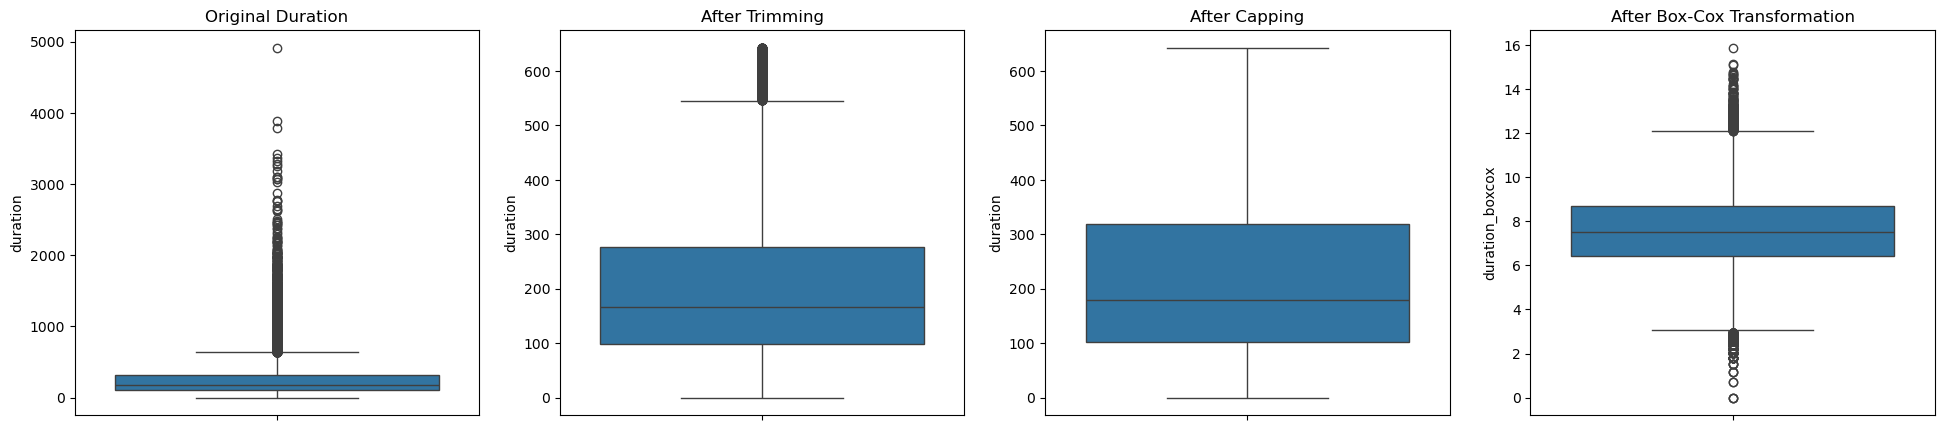

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Original duration
sns.boxplot(data['duration'], ax=axes[0])
axes[0].set_title("Original Duration")

# After Trimming
sns.boxplot(data_trimmed['duration'], ax=axes[1])
axes[1].set_title("After Trimming")

# After Capping
sns.boxplot(data_capped['duration'], ax=axes[2])
axes[2].set_title("After Capping")

# After Box-Cox Transformation
sns.boxplot(data['duration_boxcox'], ax=axes[3])
axes[3].set_title("After Box-Cox Transformation")

plt.show()


**Original Duration:**
- The original duration distribution has a wide range, with values extending up to 5000 seconds.
- The distribution is highly skewed, with most durations concentrated below 1000 seconds.

**After Trimming:**
- Outliers have been removed, resulting in a more compact range.
- The distribution is less skewed, but the dataset size is reduced.

**After Capping:**
- Outliers have been capped at the lower and upper bounds, preserving the dataset size.
- The duration range is now constrained, and extreme values no longer skew the distribution.

**After Box-Cox Transformation:**
- The Box-Cox transformation has normalized the distribution, reducing the impact of outliers.
- The transformed duration values are more suitable for analysis and modeling.

**Final Decision: Apply Capping for duration**

Since capping looks good based on the boxplot analysis, we'll proceed with it.

**Why Capping Instead of Trimming or Transformation?**

Preserves all data:
- Trimming would remove 3,235 rows, which is a significant data loss.
- Capping keeps all records while controlling outliers.

Maintains Interpretability:
- Log/Box-Cox transformation makes the data less interpretable because the original units change.
- Capping keeps the original scale of duration, making it easy to analyze.

Prevents Model Distortion:
- Machine learning models are sensitive to extreme values.
- Capping ensures no outlier dominates the predictions.


In [31]:
# Compute IQR for duration
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds using 1.5 IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
data['duration'] = data['duration'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Verify the changes
print(data['duration'].describe())


count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: duration, dtype: float64


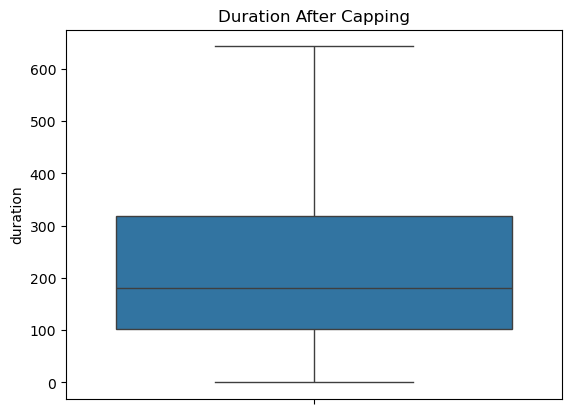

In [32]:
sns.boxplot(data['duration'])
plt.title("Duration After Capping")
plt.show()

- Outliers have been removed by capping the duration values at the lower and upper bounds.
- The duration range is now constrained, and extreme values no longer skew the distribution.
- The dataset size remains unchanged, but the impact of outliers has been mitigated.

**Checking Outliers for 'campaign'**

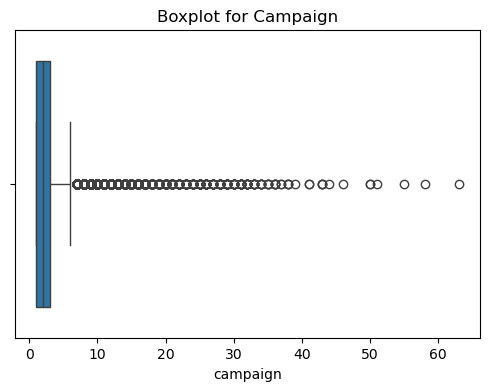

Number of outliers in 'campaign': 3064


In [33]:
# Boxplot for 'campaign'
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['campaign'])
plt.title("Boxplot for Campaign")
plt.show()

# IQR method for 'campaign'
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_campaign = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]

print(f"Number of outliers in 'campaign': {outliers_campaign.shape[0]}")


- The boxplot shows the distribution of the number of contacts (`campaign`) during the campaign.
- The range of contacts is from 0 to 60, with most values concentrated between 1 and 6.
- Outliers are present, indicating some clients were contacted significantly more times than the majority.

In [34]:
# Define different IQR multipliers
multipliers = [1.0, 1.5, 2.0, 3.0]

# Compute Q1 and Q3 for the "campaign" column
Q1_campaign = data['campaign'].quantile(0.25)
Q3_campaign = data['campaign'].quantile(0.75)
IQR_campaign = Q3_campaign - Q1_campaign

# Check outliers for different multipliers
for m in multipliers:
    lower_bound = Q1_campaign - m * IQR_campaign
    upper_bound = Q3_campaign + m * IQR_campaign
    outliers = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]
    
    print(f"Multiplier {m}: Number of outliers in 'campaign' = {outliers.shape[0]}")


Multiplier 1.0: Number of outliers in 'campaign' = 4355
Multiplier 1.5: Number of outliers in 'campaign' = 3064
Multiplier 2.0: Number of outliers in 'campaign' = 2329
Multiplier 3.0: Number of outliers in 'campaign' = 1462


In [35]:
lower_bound_campaign = Q1_campaign - 1.5 * IQR_campaign
upper_bound_campaign = Q3_campaign + 1.5 * IQR_campaign

# Apply capping to the "campaign" column
data['campaign'] = data['campaign'].apply(
    lambda x: lower_bound_campaign if x < lower_bound_campaign else 
              (upper_bound_campaign if x > upper_bound_campaign else x)
)

# Verify the changes
print(data['campaign'].describe())


count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: campaign, dtype: float64


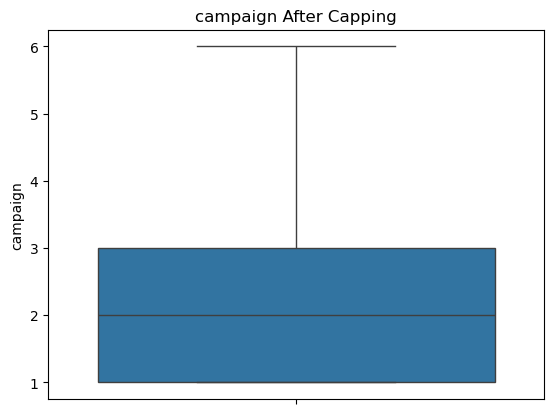

In [36]:
sns.boxplot(data['campaign'])
plt.title("campaign After Capping")
plt.show()

- Outliers have been removed by capping the `campaign` values at the lower and upper bounds.
- The `campaign` range is now constrained to 1-6, and extreme values no longer skew the distribution.
- The dataset size remains unchanged, but the impact of outliers has been mitigated.
- After capping:
  - Mean: 2.39 contacts.
  - Standard deviation: 1.60.
  - Minimum: 1 contact.
  - Maximum: 6 contacts (capped from the original max of 63 contacts).

**Checking Outliers for 'previous'**

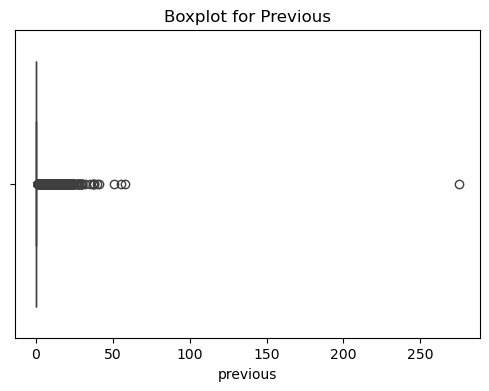

Number of outliers in 'previous': 8257


In [37]:
# Boxplot for 'previous'
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['previous'])
plt.title("Boxplot for Previous")
plt.show()

# IQR method for 'previous'
Q1 = data['previous'].quantile(0.25)
Q3 = data['previous'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_previous = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]

print(f"Number of outliers in 'previous': {outliers_previous.shape[0]}")


- The distribution of the `previous` column (number of previous contacts) is highly skewed.
- Most clients have 0 previous contacts, with a few extreme values reaching up to 275.
- The frequency drops sharply after 0, indicating that very few clients were contacted multiple times in previous campaigns.

In [38]:
Q1_previous = data['previous'].quantile(0.25)
Q3_previous = data['previous'].quantile(0.75)
IQR_previous = Q3_previous - Q1_previous

# Check outliers for different multipliers
for m in multipliers:
    lower_bound = Q1_previous - m * IQR_previous
    upper_bound = Q3_previous + m * IQR_previous
    outliers = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]
    
    print(f"Multiplier {m}: Number of outliers in 'previous' = {outliers.shape[0]}")


Multiplier 1.0: Number of outliers in 'previous' = 8257
Multiplier 1.5: Number of outliers in 'previous' = 8257
Multiplier 2.0: Number of outliers in 'previous' = 8257
Multiplier 3.0: Number of outliers in 'previous' = 8257


In [39]:
lower_bound_previous = Q1_previous - 1.5 * IQR_previous
upper_bound_previous = Q3_previous + 1.5 * IQR_previous
previous_capping = data.copy()
# Apply capping to the "previous" column
previous_capping['previous'] = data['previous'].apply(
    lambda x: lower_bound_previous if x < lower_bound_previous else 
              (upper_bound_previous if x > upper_bound_previous else x)
)

# Verify the changes
print(previous_capping['previous'].describe())


count    45211.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64


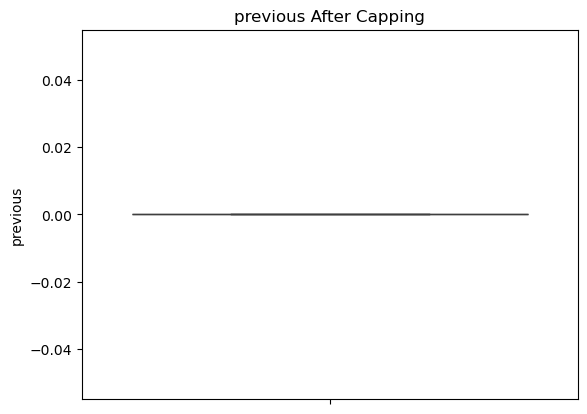

In [40]:
sns.boxplot(previous_capping['previous'])
plt.title("previous After Capping")
plt.show()

The "previous" column is becoming 0 for all values after capping, this likely means that the calculated upper bound is very low—perhaps even 0 or negative. This can happen if the IQR is small and the data is heavily skewed.

**Checking the Distribution of "previous"**

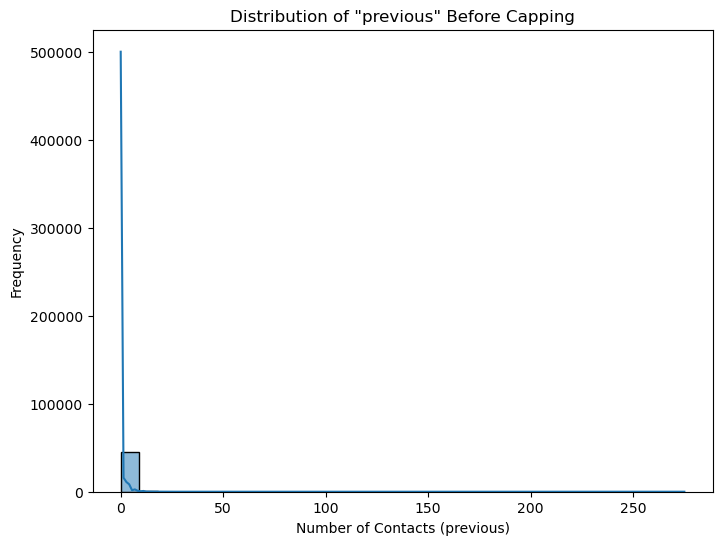

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['previous'], bins=30, kde=True)
plt.title('Distribution of "previous" Before Capping')
plt.xlabel('Number of Contacts (previous)')
plt.ylabel('Frequency')
plt.show()


- The plot shows a highly skewed distribution, with most values concentrated at 0.
- Outliers are present, with some clients having up to 275 previous contacts.

In [42]:
from scipy.stats.mstats import winsorize
previous_winsor = data.copy()
# Apply Winsorization to the "previous" column
previous_winsor['previous'] = winsorize(data['previous'], limits=[0.01, 0.01])

# Verify the chaAftewnges
print(previous_winsor['previous'].describe())


count    45211.000000
mean         0.525691
std          1.463596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: previous, dtype: float64


C:\Users\rhyth\anaconda3\envs\hvp_interview\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


- The boxplot shows a highly skewed distribution, with most values concentrated at 0.
- Outliers are present, with some clients having up to 275 previous contacts.

Percentile Analysis for Identifying Upper Capping Threshold

In [43]:
# Check percentiles from 95% to 100% in 1% increments
print("Percentile Analysis for 'previous' Column:")
for x in range(95, 101, 1):
    print(f"{x}% of 'previous' values are <= {data['previous'].quantile(x/100)}")


Percentile Analysis for 'previous' Column:
95% of 'previous' values are <= 3.0
96% of 'previous' values are <= 4.0
97% of 'previous' values are <= 5.0
98% of 'previous' values are <= 6.0
99% of 'previous' values are <= 8.900000000001455
100% of 'previous' values are <= 275.0


- Interquartile Range (IQR) Calculation for 'previous' Column

In [44]:
# Calculate IQR for reference
iqr = data['previous'].quantile(0.75) - data['previous'].quantile(0.25)
print(f"IQR of 'previous' Column: {iqr}")


IQR of 'previous' Column: 0.0


- Capping 'previous' Column at 99th Percentile to Handle Outliers

In [45]:
upper_bound_previous = data['previous'].quantile(0.99)
# Apply capping to the "previous" column
data['previous'] = data['previous'].apply(lambda x: min(x, upper_bound_previous))

# Check the distribution after capping
print("Data Distribution After Capping at 99th Percentile:")
print(data['previous'].describe())


Data Distribution After Capping at 99th Percentile:
count    45211.000000
mean         0.524689
std          1.457817
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.900000
Name: previous, dtype: float64


- Outliers have been removed by capping the `previous` values at 9.
- The `previous` range is now constrained to 0-9, and extreme values no longer skew the distribution.
- The dataset size remains unchanged, but the impact of outliers has been mitigated.
- After capping:
  - Mean: 0.53 contacts.
  - Standard deviation: 1.46.
  - Minimum: 0 contacts.
  - Maximum: 9 contacts (capped from the original max of 275 contacts).

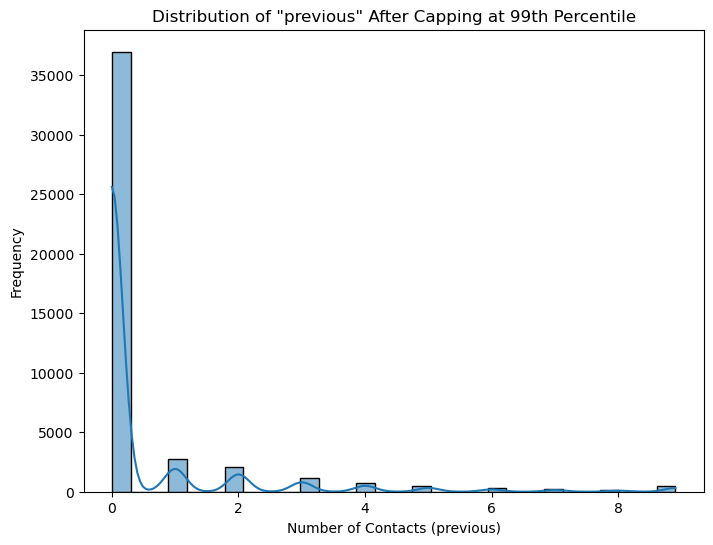

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['previous'], bins=30, kde=True)
plt.title('Distribution of "previous" After Capping at 99th Percentile')
plt.xlabel('Number of Contacts (previous)')
plt.ylabel('Frequency')
plt.show()


- The distribution of the `previous` feature (number of contacts) is now more balanced after capping at the 99th percentile.
- Extreme outliers have been removed, resulting in a more normalized distribution.
- This improves the model's performance by reducing the influence of extreme values, making the feature more reliable for predictions.
- The capped distribution is better suited for analysis and modeling compared to the original distribution, which may have been skewed by outliers.

### Exploratory Data Analysis (EDA)

**1. Visualize the Distribution of the Target Variable (y) Across Categorical Features**

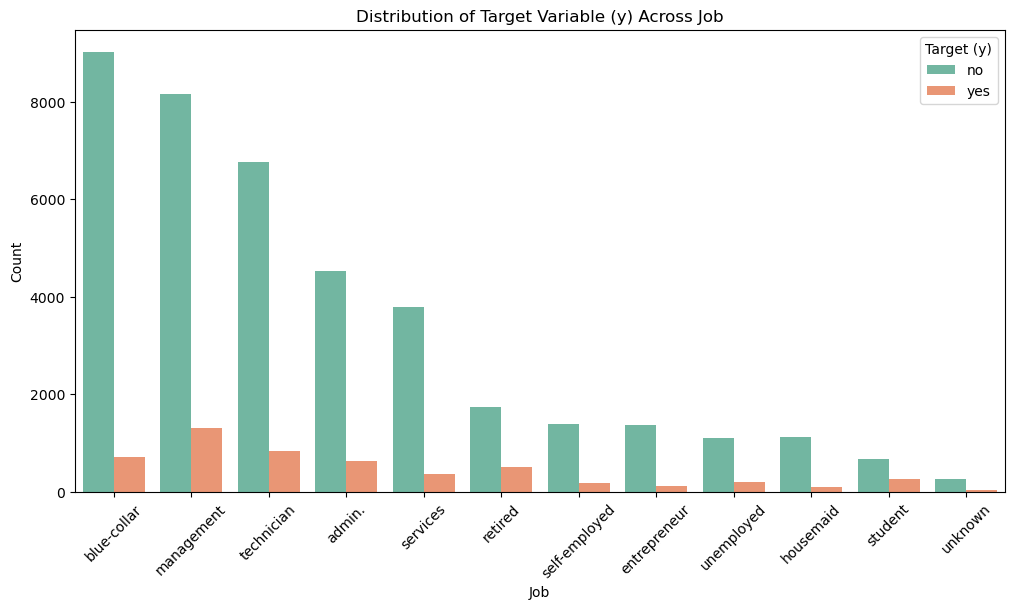

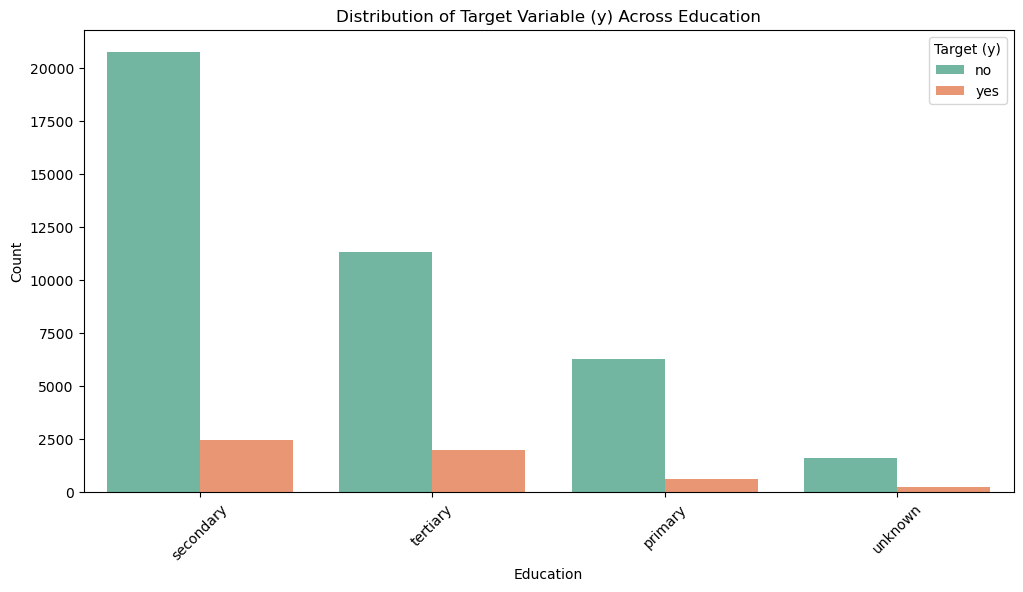

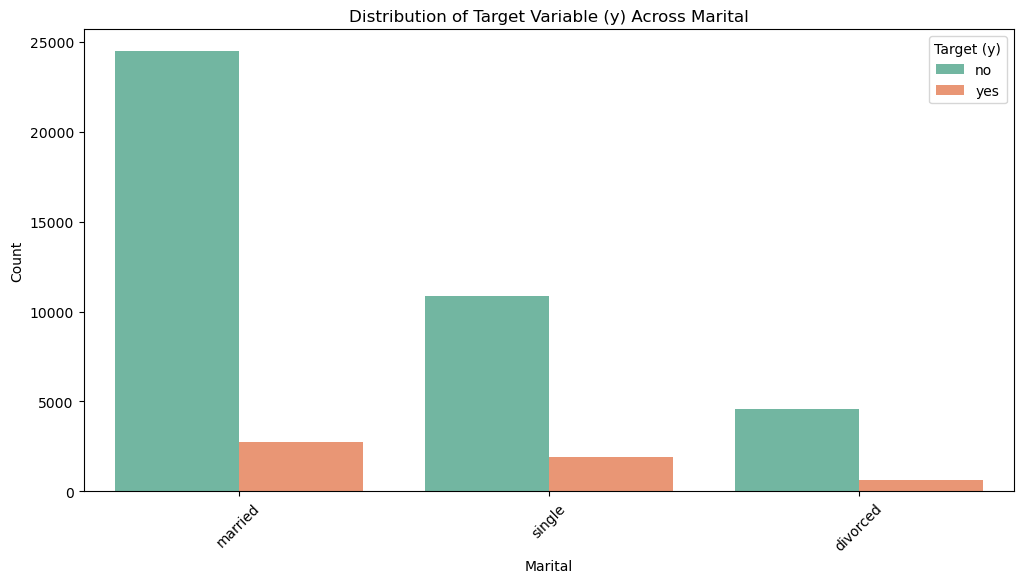

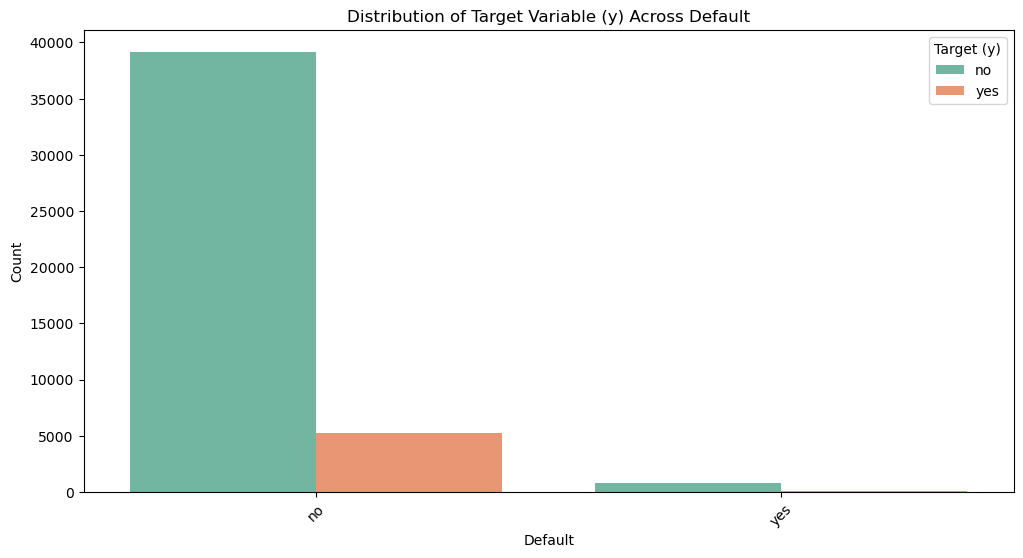

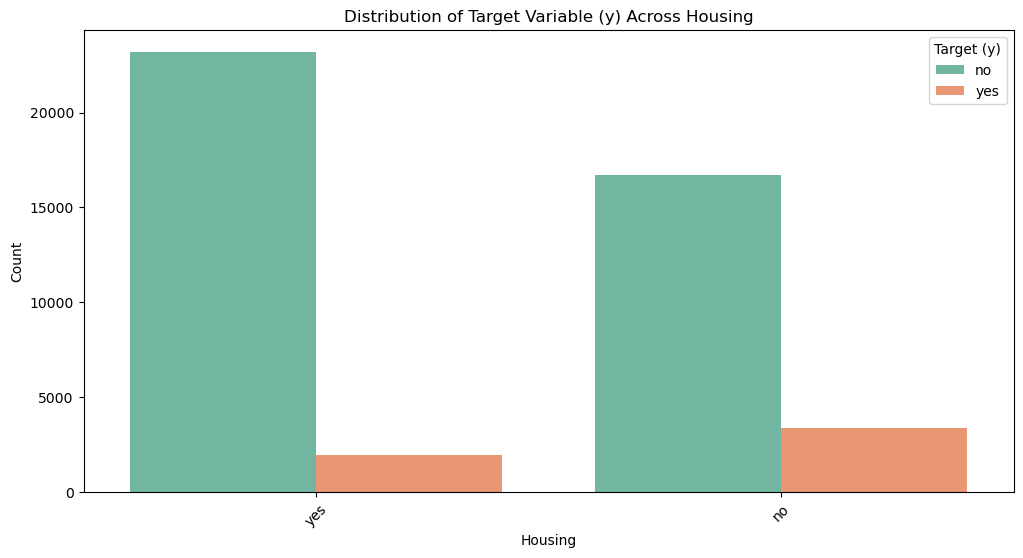

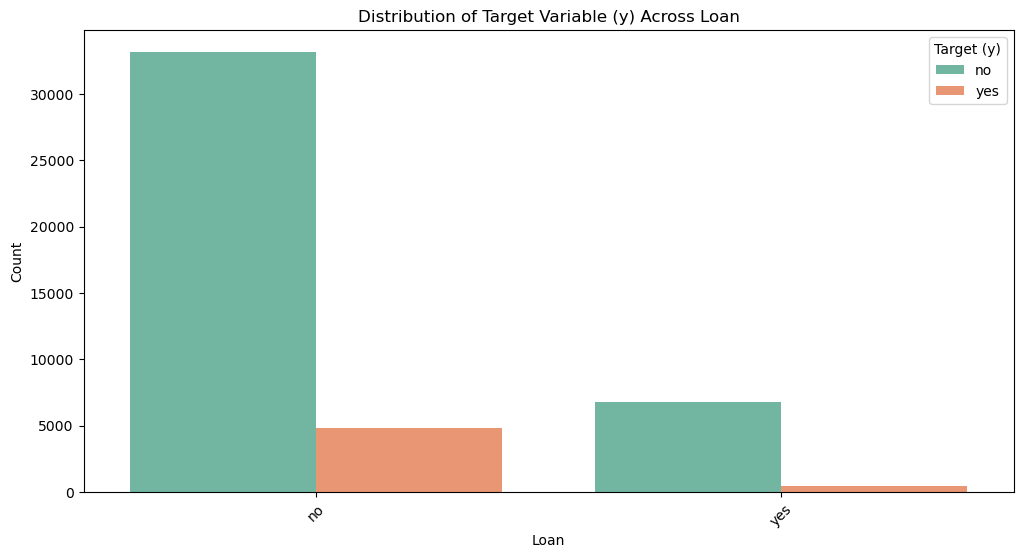

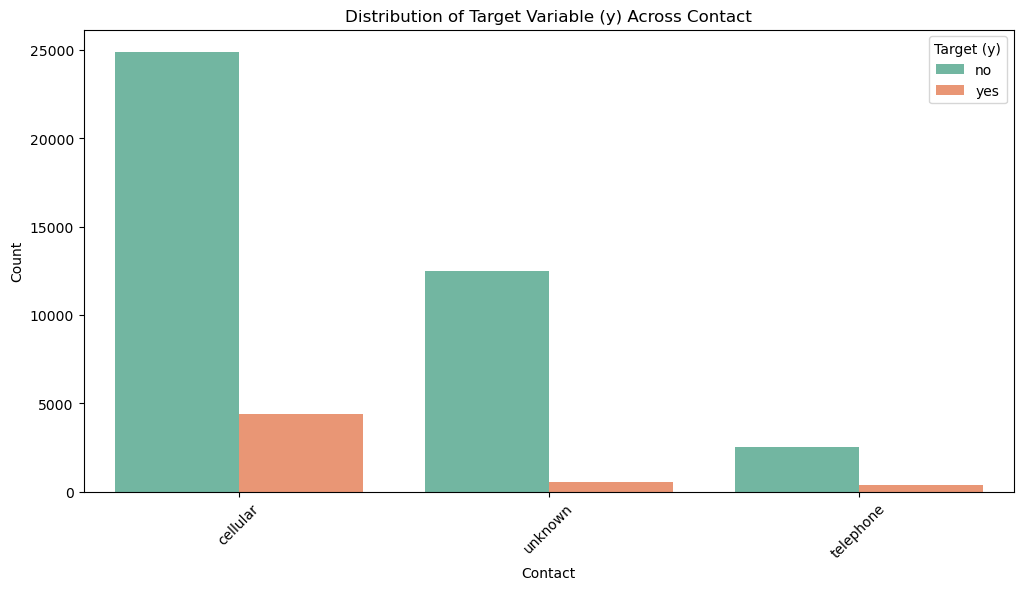

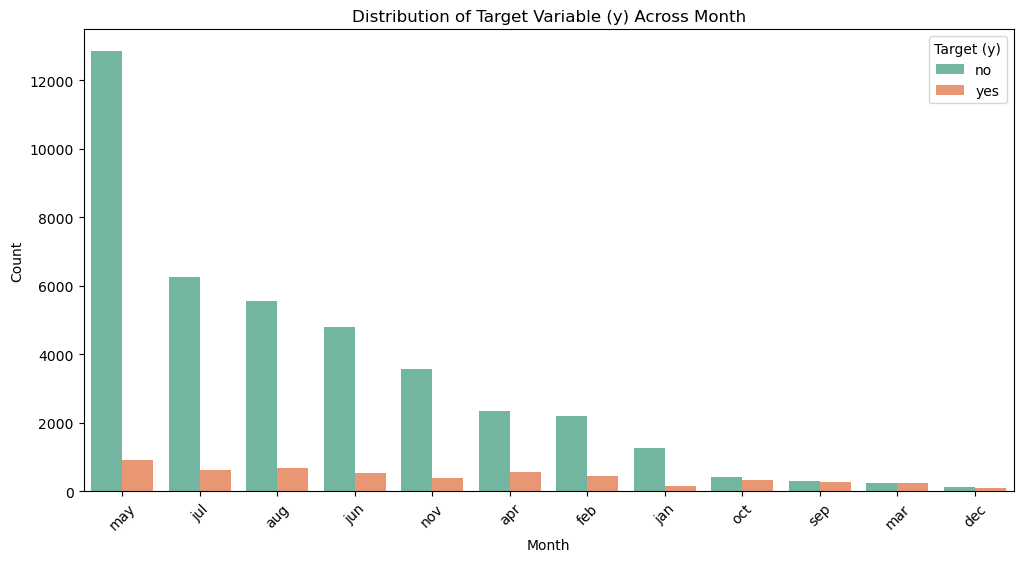

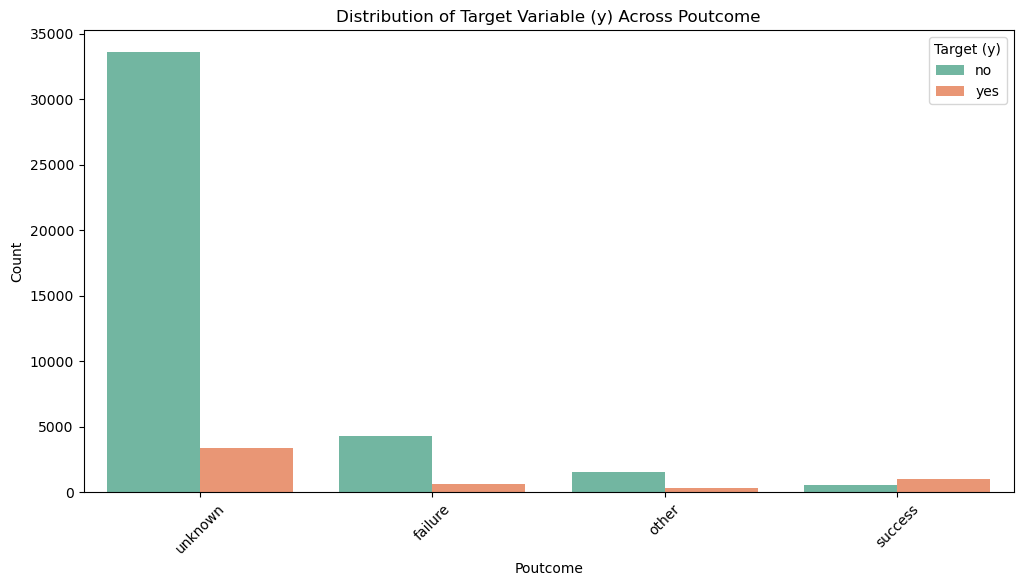

In [48]:
categorical_features = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot distribution of target variable across each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='y', data=data, palette='Set2', order=data[feature].value_counts().index)
    plt.title(f'Distribution of Target Variable (y) Across {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Target (y)', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

**Insights on the Distribution of Target Variable (y) Across Different Features:**

1. **Distribution of Target Variable (y) Across Job:**
   - Jobs like "blue-collar," "management," and "technician" have the highest number of people who did not subscribe.
   - Jobs like "retired" and "student" show a relatively higher proportion of people who subscribed compared to others.
   - Job type might influence the likelihood of subscribing to a term deposit.
     

2. **Distribution of Target Variable (y) Across Education:**
   - People with "secondary" and "tertiary" education levels are the most common in the dataset.
   - Individuals with "tertiary" education are more likely to subscribe compared to others.
   - People with "unknown" education levels have the lowest subscription rate.

3. **Distribution of Target Variable (y) Across Marital Status:**
   - Married individuals are the largest group in the dataset.
   - Single individuals have a slightly higher proportion of subscriptions compared to married or divorced individuals.
   - Marital status might have a moderate influence on subscription rates.

4. **Distribution of Target Variable (y) Across Default:**
   - The vast majority of people in the dataset do not have a credit default.
   - Very few people with a default subscribed to a term deposit.
   - Having a credit default might reduce the chances of subscribing.

5. **Distribution of Target Variable (y) Across Housing Loan:**
   - People without a housing loan are slightly more likely to subscribe to a term deposit compared to those with a housing loan.
   - Housing loan status could be a relevant feature for predicting the target variable.

6. **Distribution of Target Variable (y) Across Personal Loan:**
   - People without a personal loan are more likely to subscribe to a term deposit compared to those with a personal loan.
   - Personal loan status could be a useful feature for the model.

7. **Distribution of Target Variable (y) Across Contact Method:**
   - People contacted via cellular are more likely to subscribe compared to those contacted via telephone.
   - The contact method plays a role in subscription rates, with "cellular" contacts showing a higher conversion rate.

8. **Distribution of Target Variable (y) Across Month:**
   - The highest number of contacts and subscriptions occur in May, followed by July and August.
   - Months like December and March have the lowest subscription rates.
   - The timing of the campaign (month) could significantly influence the target variable.

9. **Distribution of Target Variable (y) Across Previous Campaign Outcome (Poutcome):**
   - People who had a "success" in the previous campaign are more likely to subscribe again.
   - Those with "failure" or "unknown" outcomes are less likely to subscribe.
   - The outcome of previous campaigns is a strong predictor of subscription rates.


**2. Analyze the Success Rate (y=1) for Each Category in Categorical Features**


Success Rate (y=1) for job:
job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072750
Name: y_encoded, dtype: float64



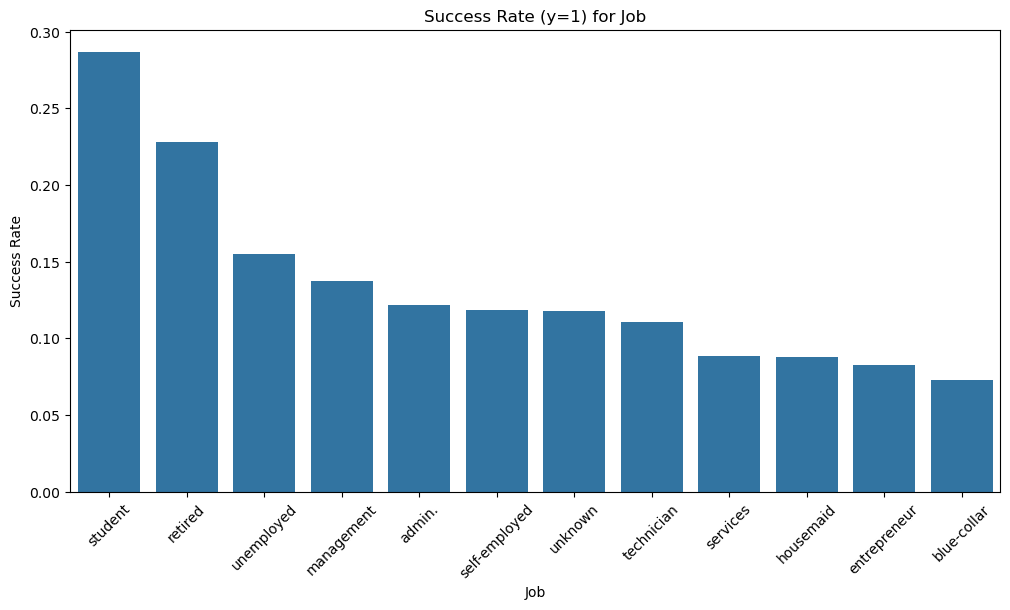

Success Rate (y=1) for education:
education
tertiary     0.150064
unknown      0.135703
secondary    0.105594
primary      0.086265
Name: y_encoded, dtype: float64



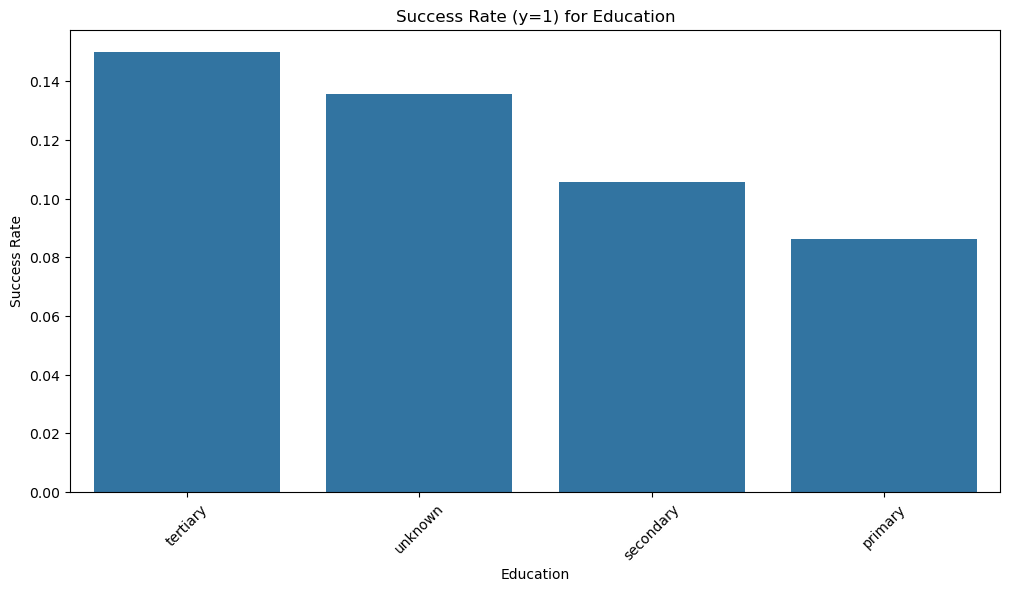

Success Rate (y=1) for marital:
marital
single      0.149492
divorced    0.119455
married     0.101235
Name: y_encoded, dtype: float64



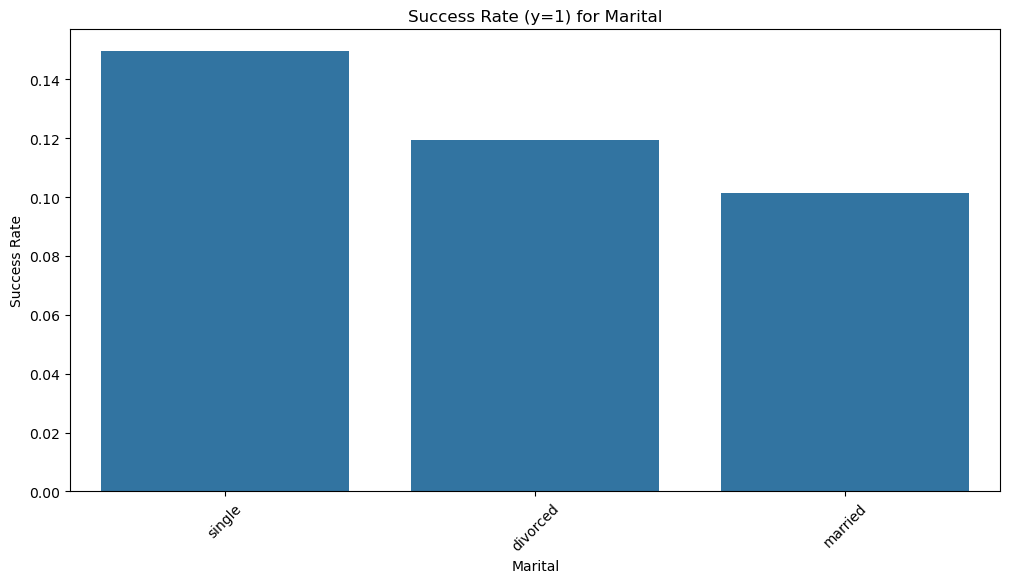

Success Rate (y=1) for default:
default
no     0.117961
yes    0.063804
Name: y_encoded, dtype: float64



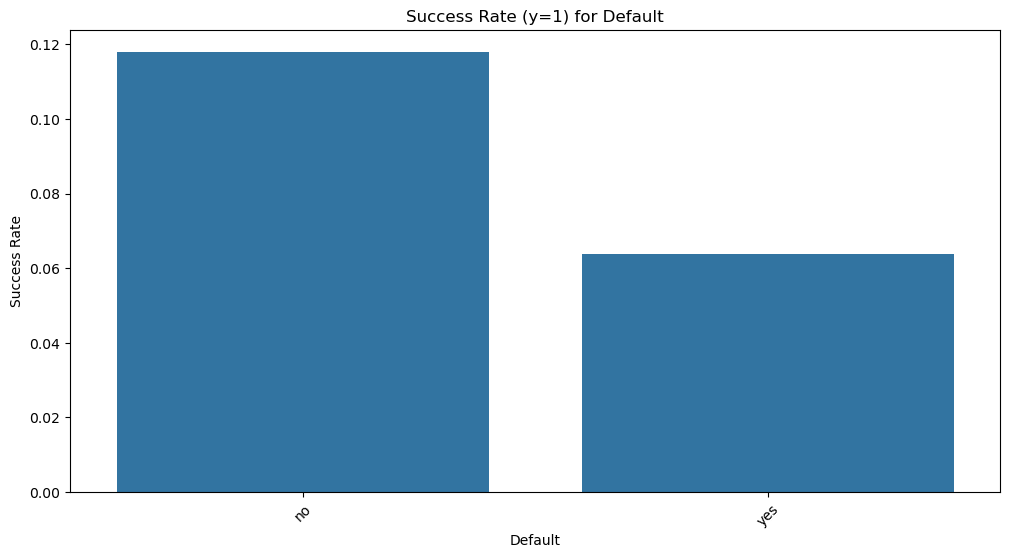

Success Rate (y=1) for housing:
housing
no     0.167024
yes    0.077000
Name: y_encoded, dtype: float64



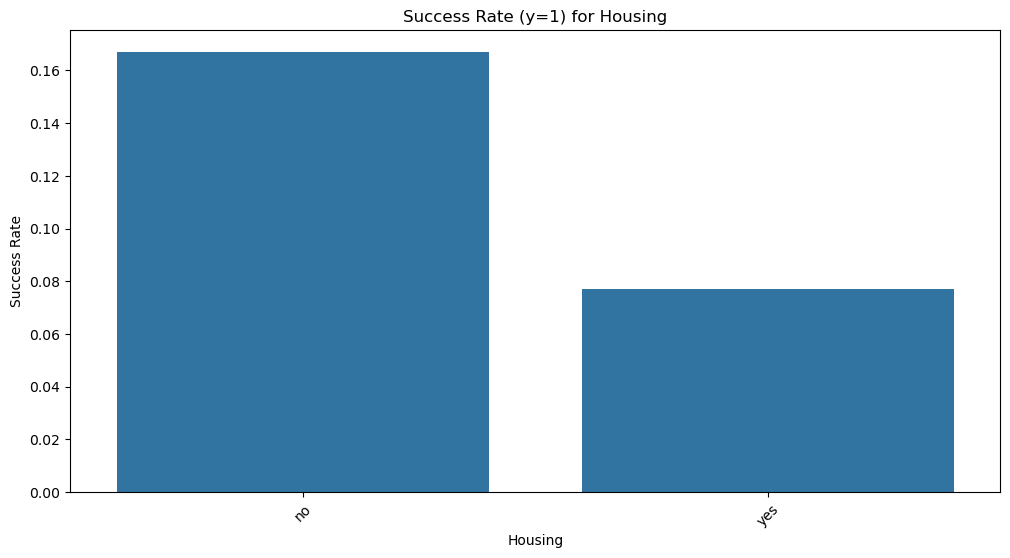

Success Rate (y=1) for loan:
loan
no     0.126557
yes    0.066814
Name: y_encoded, dtype: float64



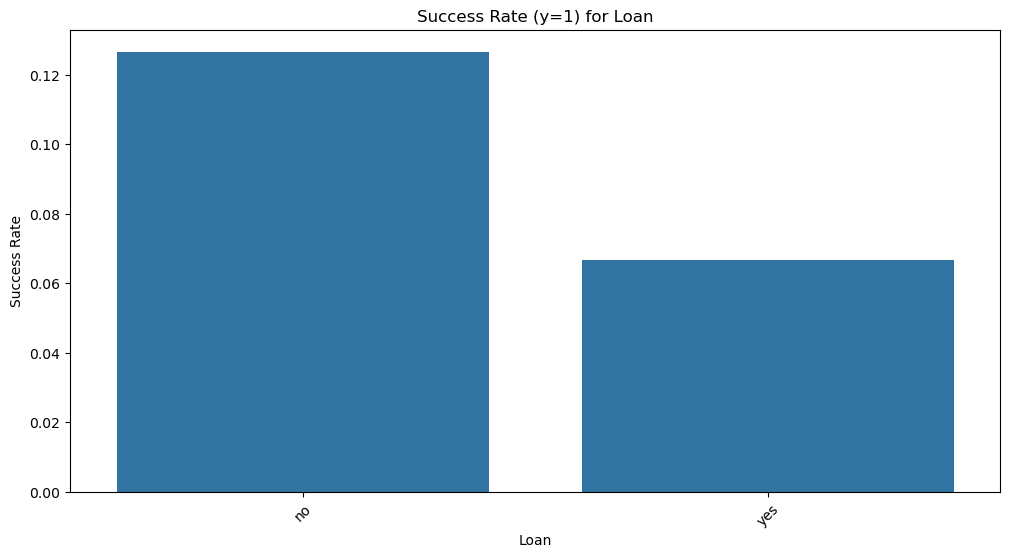

Success Rate (y=1) for contact:
contact
cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: y_encoded, dtype: float64



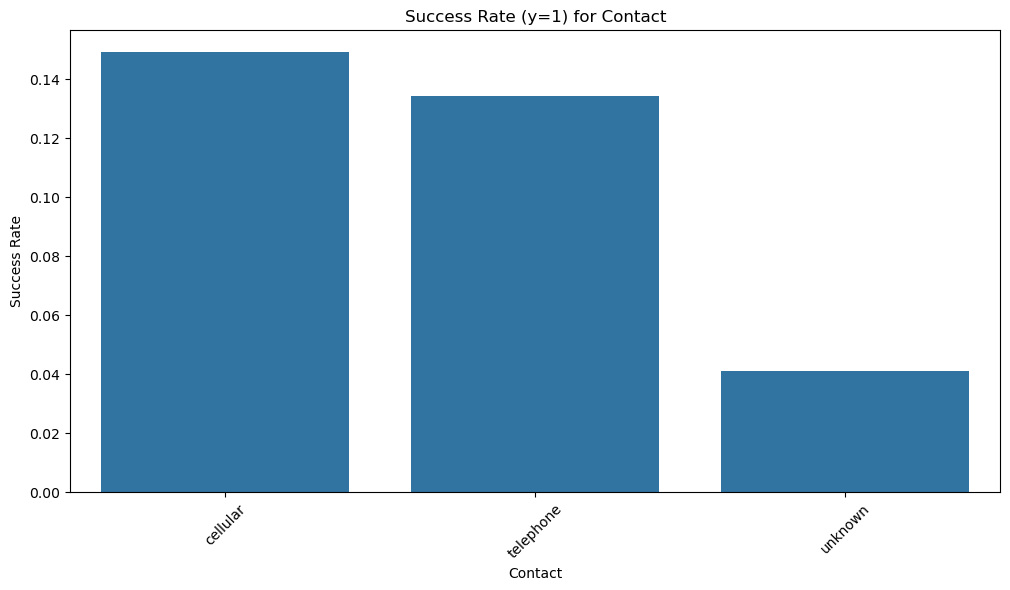

Success Rate (y=1) for month:
month
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110133
jun    0.102228
nov    0.101511
jan    0.101212
jul    0.090935
may    0.067195
Name: y_encoded, dtype: float64



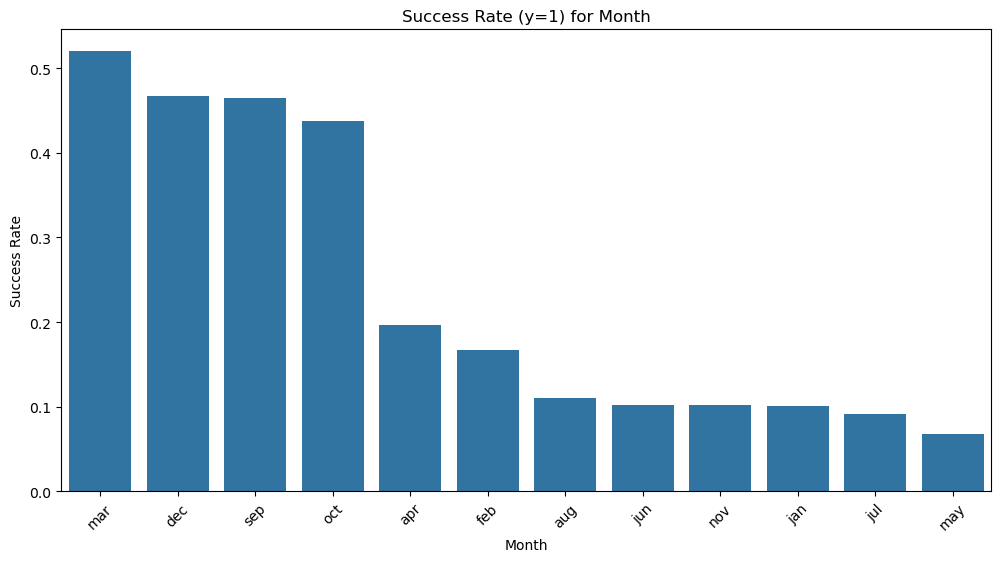

Success Rate (y=1) for poutcome:
poutcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091615
Name: y_encoded, dtype: float64



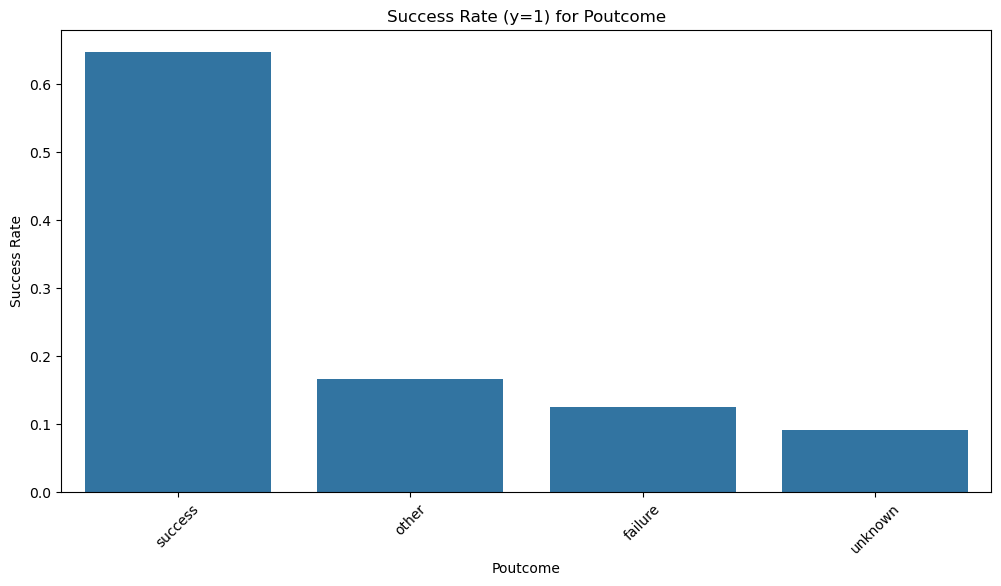

In [49]:
# Encode the target variable (y) for success rate calculation
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded = data.copy()

# Apply label encoding to the target variable (y)
le = LabelEncoder()
df_encoded['y_encoded'] = le.fit_transform(data['y'])

# Calculate and visualize success rate (y=1) for each category in categorical features
for feature in categorical_features:
    # Calculate success rate
    success_rate = df_encoded.groupby(feature)['y_encoded'].mean().sort_values(ascending=False)
    
    # Print success rate
    print(f"Success Rate (y=1) for {feature}:\n{success_rate}\n")
    
    # Visualize success rate
    plt.figure(figsize=(12, 6))
    sns.barplot(x=success_rate.index, y=success_rate.values, order=success_rate.index)
    plt.title(f'Success Rate (y=1) for {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)
    plt.show()

**Analysis of Success Rate (y=1) for Each Category in Categorical Features:**

1. **Success Rate (y=1) for Job:**
   - **Highest Success Rate:**  
     - **Student (28.68%)**: Students have the highest likelihood of subscribing to a term deposit.  
     - **Retired (22.79%)**: Retired individuals also show a high subscription rate.  
   - **Lowest Success Rate:**  
     - **Blue-collar (7.28%)**: Blue-collar workers have the lowest subscription rate.  
     - **Entrepreneur (8.27%)**: Entrepreneurs also show a relatively low subscription rate.  
   - **Insight:** Job type significantly influences subscription rates, with students and retired individuals being the most likely to subscribe.

2. **Success Rate (y=1) for Education:**
   - **Highest Success Rate:**  
     - **Tertiary (15.01%)**: Individuals with tertiary education have the highest subscription rate.  
     - **Unknown (13.57%)**: Those with unknown education levels also show a relatively high subscription rate.  
   - **Lowest Success Rate:**  
     - **Primary (8.63%)**: Individuals with primary education have the lowest subscription rate.  
   - **Insight:** Higher education levels (tertiary) correlate with higher subscription rates, while primary education correlates with lower rates.

3. **Success Rate (y=1) for Marital Status:**
   - **Highest Success Rate:**  
     - **Single (14.95%)**: Single individuals are the most likely to subscribe.  
   - **Lowest Success Rate:**  
     - **Married (10.12%)**: Married individuals have the lowest subscription rate.  
   - **Insight:** Marital status influences subscription rates, with single individuals being more likely to subscribe compared to married or divorced individuals.

4. **Success Rate (y=1) for Default:**
   - **Highest Success Rate:**  
     - **No (11.80%)**: Individuals without a credit default are more likely to subscribe.  
   - **Lowest Success Rate:**  
     - **Yes (6.38%)**: Individuals with a credit default have a significantly lower subscription rate.  
   - **Insight:** Having a credit default reduces the likelihood of subscribing to a term deposit.

5. **Success Rate (y=1) for Housing Loan:**
   - **Highest Success Rate:**  
     - **No (16.70%)**: Individuals without a housing loan are more likely to subscribe.  
   - **Lowest Success Rate:**  
     - **Yes (7.70%)**: Individuals with a housing loan have a lower subscription rate.  
   - **Insight:** Housing loan status affects subscription rates, with those without a housing loan being more likely to subscribe.

6. **Success Rate (y=1) for Personal Loan:**
   - **Highest Success Rate:**  
     - **No (12.66%)**: Individuals without a personal loan are more likely to subscribe.  
   - **Lowest Success Rate:**  
     - **Yes (6.68%)**: Individuals with a personal loan have a lower subscription rate.  
   - **Insight:** Personal loan status influences subscription rates, with those without a personal loan being more likely to subscribe.

7. **Success Rate (y=1) for Contact Method:**
   - **Highest Success Rate:**  
     - **Cellular (14.92%)**: Individuals contacted via cellular are more likely to subscribe.  
   - **Lowest Success Rate:**  
     - **Unknown (4.07%)**: Individuals with unknown contact methods have the lowest subscription rate.  
   - **Insight:** The contact method plays a significant role, with cellular contacts showing higher subscription rates compared to telephone or unknown methods.

8. **Success Rate (y=1) for Month:**
   - **Highest Success Rate:**  
     - **March (51.99%)**: March has the highest subscription rate.  
     - **December (46.73%)**: December also shows a high subscription rate.  
   - **Lowest Success Rate:**  
     - **May (6.72%)**: May has the lowest subscription rate.  
   - **Insight:** Subscription rates vary significantly by month, with March and December being the most successful months for campaigns.

9. **Success Rate (y=1) for Previous Campaign Outcome (Poutcome):**
   - **Highest Success Rate:**  
     - **Success (64.73%)**: Individuals with a successful outcome in the previous campaign are highly likely to subscribe again.  
   - **Lowest Success Rate:**  
     - **Unknown (9.16%)**: Individuals with unknown previous campaign outcomes have the lowest subscription rate.  
   - **Insight:** Previous campaign outcomes are a strong predictor of subscription rates, with "success" leading to significantly higher subscription rates.


**3. Cross-Tabulation of Categorical Features with Target Variable**

In [50]:
# Perform cross-tabulation for deeper insights
for feature in categorical_features:
    cross_tab = pd.crosstab(data[feature], data['y'], normalize='index') * 100
    cross_tab = cross_tab.sort_values(by='yes', ascending=False)  
    print(f"Cross-Tabulation of {feature} with Target Variable (y):\n{cross_tab}\n")

Cross-Tabulation of job with Target Variable (y):
y                     no        yes
job                                
student        71.321962  28.678038
retired        77.208481  22.791519
unemployed     84.497314  15.502686
management     86.244449  13.755551
admin.         87.797331  12.202669
self-employed  88.157061  11.842939
unknown        88.194444  11.805556
technician     88.943004  11.056996
services       91.116996   8.883004
housemaid      91.209677   8.790323
entrepreneur   91.728312   8.271688
blue-collar    92.725031   7.274969

Cross-Tabulation of education with Target Variable (y):
y                 no        yes
education                      
tertiary   84.993610  15.006390
unknown    86.429725  13.570275
secondary  89.440565  10.559435
primary    91.373522   8.626478

Cross-Tabulation of marital with Target Variable (y):
y                no        yes
marital                       
single    85.050821  14.949179
divorced  88.054542  11.945458
married   89.87653

**Insights from Cross-Tabulation Analysis:**

1. **Job:**
   - **Students and Retired Individuals:** These groups are more likely to subscribe to a term deposit compared to others. Students might be looking for investment opportunities, while retired individuals may be managing their savings.
   - **Blue-collar Workers and Entrepreneurs:** These groups are less likely to subscribe, possibly due to lower disposable income or different financial priorities.

2. **Education:**
   - **Higher Education (Tertiary):** People with higher education levels are more likely to subscribe, possibly because they have better financial literacy or higher income.
   - **Primary Education:** Individuals with primary education are less likely to subscribe, which could be due to limited financial knowledge or resources.

3. **Marital Status:**
   - **Single Individuals:** Single people are more likely to subscribe, possibly because they have fewer financial responsibilities compared to married or divorced individuals.
   - **Married Individuals:** Married people are less likely to subscribe, potentially due to shared financial responsibilities or different priorities.

4. **Default (Credit Default):**
   - **No Default:** People without a credit default are more likely to subscribe, as they are likely in a better financial position.
   - **Default:** Individuals with a credit default are much less likely to subscribe, possibly due to financial instability or poor credit history.

5. **Housing Loan:**
   - **No Housing Loan:** People without a housing loan are more likely to subscribe, possibly because they have more disposable income.
   - **Housing Loan:** Individuals with a housing loan are less likely to subscribe, likely due to existing financial commitments.

6. **Personal Loan:**
   - **No Personal Loan:** People without a personal loan are more likely to subscribe, as they may have fewer financial obligations.
   - **Personal Loan:** Individuals with a personal loan are less likely to subscribe, possibly due to existing debt.

7. **Contact Method:**
   - **Cellular Contact:** People contacted via cellular are more likely to subscribe, possibly because they are more accessible or prefer mobile communication.
   - **Unknown Contact Method:** Individuals with unknown contact methods are much less likely to subscribe, possibly due to lack of engagement or incorrect contact details.

8. **Month:**
   - **March and December:** These months have the highest subscription rates, possibly due to seasonal factors like bonuses, holidays, or year-end financial planning.
   - **May:** May has the lowest subscription rate, which could be due to fewer financial activities or campaigns during this period.

9. **Previous Campaign Outcome (Poutcome):**
   - **Success in Previous Campaign:** Individuals who had a successful outcome in the previous campaign are highly likely to subscribe again, indicating strong customer loyalty or satisfaction.
   - **Unknown Outcome:** Individuals with unknown previous campaign outcomes are less likely to subscribe, possibly due to lack of engagement or poor previous experiences.

**These can help in targeting the right audience and optimizing marketing strategies for better subscription rates.**

**4. Heatmap of Correlation Between Categorical Features and Target Variable**


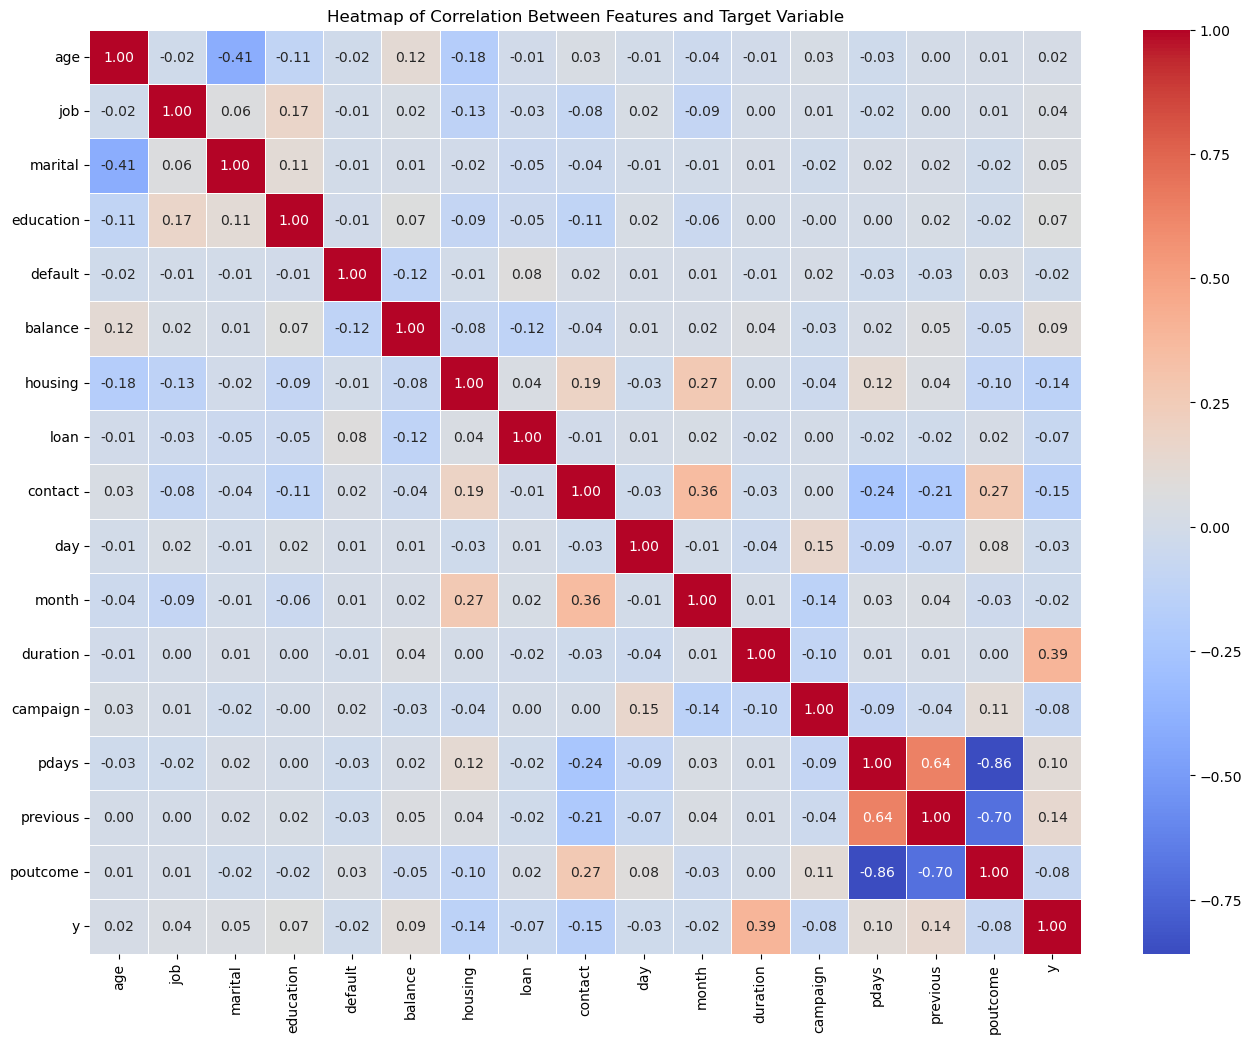

In [51]:
data_encoded = data.copy()
columns_to_drop = ['age_log', 'age_boxcox', 'balance_shifted', 'balance_boxcox', 'duration_log', 'duration_boxcox']
data_encoded = data_encoded.drop(columns=columns_to_drop)

le = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for column in categorical_columns:
    data_encoded[column] = le.fit_transform(data[column])

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Between Features and Target Variable')
plt.show()

**Insights from the Heatmap of Correlation Between Features and Target Variable:**




1. **Age:**
   - Age has a weak negative correlation with marital status (-0.41), indicating that older individuals are less likely to be single.
   - Age shows a very weak positive correlation with balance (0.12), suggesting that older individuals might have slightly higher balances.

2. **Job:**
   - Job has a weak positive correlation with education (0.17), indicating that certain jobs are associated with higher education levels.
   - Job shows a very weak correlation with the target variable (y) (0.04), suggesting a minimal direct influence on subscription rates.

3. **Marital Status:**
   - Marital status has a weak positive correlation with education (0.11), indicating that married individuals might have slightly higher education levels.
   - Marital status shows a very weak positive correlation with the target variable (y) (0.05), suggesting a minimal direct influence on subscription rates.

4. **Education:**
   - Education has a weak positive correlation with the target variable (y) (0.07), indicating that higher education levels might slightly increase the likelihood of subscription.

5. **Default:**
   - Default has a weak negative correlation with balance (-0.12), suggesting that individuals with credit defaults tend to have lower balances.
   - Default shows a very weak negative correlation with the target variable (y) (-0.02), indicating a minimal direct influence on subscription rates.

6. **Balance:**
   - Balance has a weak positive correlation with the target variable (y) (0.09), indicating that individuals with higher balances are slightly more likely to subscribe.

7. **Housing Loan:**
   - Housing loan has a moderate positive correlation with contact method (0.19) and month (0.27), suggesting that individuals with housing loans are more likely to be contacted via certain methods and during specific months.
   - Housing loan shows a weak negative correlation with the target variable (y) (-0.14), indicating that individuals with housing loans are slightly less likely to subscribe.

8. **Personal Loan:**
   - Personal loan has a very weak negative correlation with the target variable (y) (-0.07), suggesting that individuals with personal loans are slightly less likely to subscribe.

9. **Contact Method:**
   - Contact method has a moderate positive correlation with month (0.36) and a weak positive correlation with the target variable (y) (-0.15), indicating that the method of contact might influence subscription rates.

10. **Day:**
    - Day shows a very weak positive correlation with campaign (0.15), suggesting that the day of contact might slightly influence the number of contacts performed.

11. **Month:**
    - Month has a moderate positive correlation with contact method (0.36) and a weak positive correlation with housing loan (0.27), indicating that certain months are associated with specific contact methods and housing loan statuses.

12. **Duration:**
    - Duration has a moderate positive correlation with the target variable (y) (0.39), indicating that longer contact durations significantly increase the likelihood of subscription.

13. **Campaign:**
    - Campaign shows a weak positive correlation with poutcome (0.11), suggesting that the number of contacts performed might slightly influence previous campaign outcomes.

14. **Pdays:**
    - Pdays has a strong positive correlation with previous (0.64) and a strong negative correlation with poutcome (-0.86), indicating that the number of days since the last contact is closely related to previous campaign activities and outcomes.

15. **Previous:**
    - Previous has a strong positive correlation with pdays (0.64) and a strong negative correlation with poutcome (-0.70), suggesting that the number of previous contacts is closely related to the time since the last contact and previous campaign outcomes.

16. **Poutcome:**
    - Poutcome has a strong negative correlation with pdays (-0.86) and previous (-0.70), indicating that the outcome of previous campaigns is closely related to the time since the last contact and the number of previous contacts.

17. **Target Variable (y):**
    - The target variable (y) has a moderate positive correlation with duration (0.39), indicating that longer contact durations significantly increase the likelihood of subscription.
    - The target variable (y) also shows weak positive correlations with balance (0.09) and previous (0.14), suggesting that higher balances and more previous contacts might slightly increase the likelihood of subscription.

**Takeaways:**
- **Duration** is the most influential feature on the target variable (y), with a moderate positive correlation.
- **Balance** and **previous** contacts also show weak positive correlations with the target variable (y).
- **Housing loan** and **personal loan** show weak negative correlations with the target variable (y), indicating that individuals with loans are slightly less likely to subscribe.
- **Pdays** and **previous** are strongly correlated with each other and with **poutcome**, indicating that previous campaign activities significantly influence current outcomes.


**5. Pairplot for Categorical Features and Target Variable**

In [53]:
# Encode the target variable (y)
data['y_encoded'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Verify the encoding
data[['y', 'y_encoded']].head()

,y,y_encoded
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


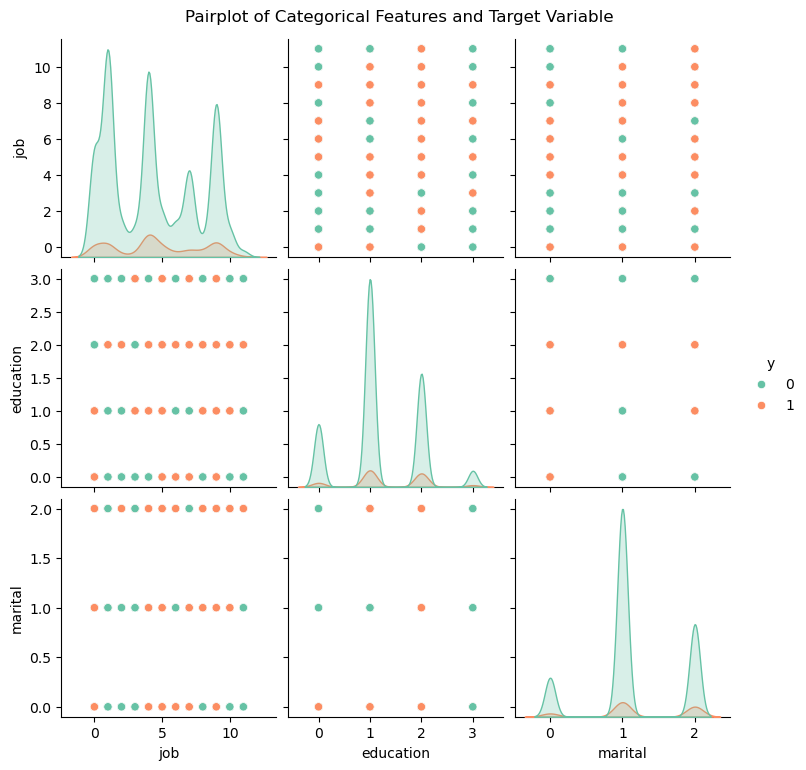

In [120]:
# Pairplot for selected categorical features and target variable
sns.pairplot(data_encoded[['job', 'education', 'marital', 'y_encoded']], hue='y_encoded', palette='Set2')
plt.suptitle('Pairplot of Categorical Features and Target Variable', y=1.02)
plt.show()

- **Job:** The distribution of the target variable (`y`) varies across different job categories. Certain jobs (e.g., "management" or "retired") show higher proportions of `y=1` (subscription), while others (e.g., "blue-collar") show lower proportions.
- **Education:** The target variable distribution differs across education levels. Clients with higher education levels (e.g., "tertiary") have a higher proportion of `y=1`, while those with lower education levels (e.g., "primary") have a lower proportion.
- **Marital Status:** The distribution of the target variable varies by marital status. Single clients show a higher proportion of `y=1` compared to married or divorced clients.
- **Key Observations:** 
  - Categorical features like `job`, `education`, and `marital` show clear differences in the distribution of the target variable.
  - These features are likely important predictors for the model, as they help distinguish between clients who subscribe (`y=1`) and those who do not (`y=0`).

**6. Target Variable Distribution Across Numerical Features**

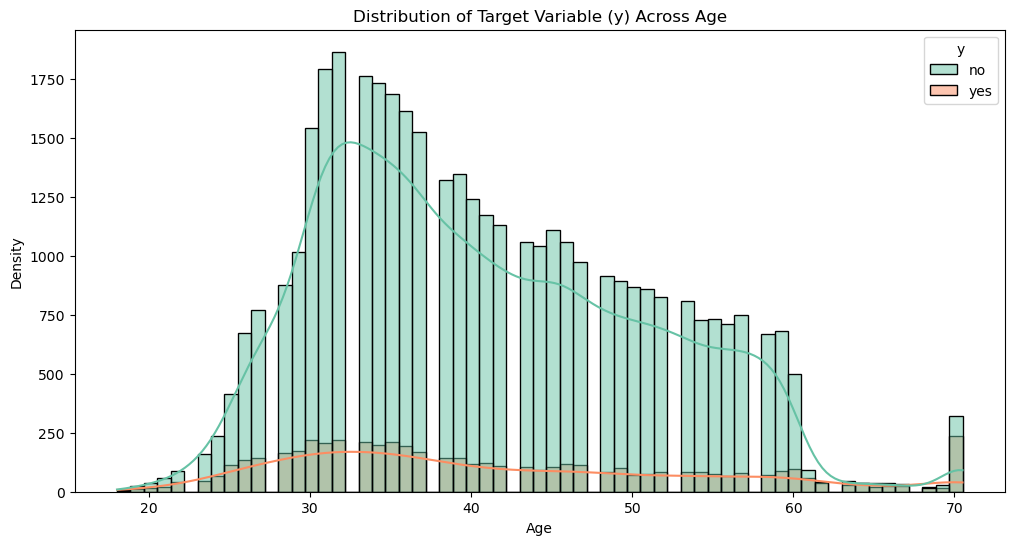

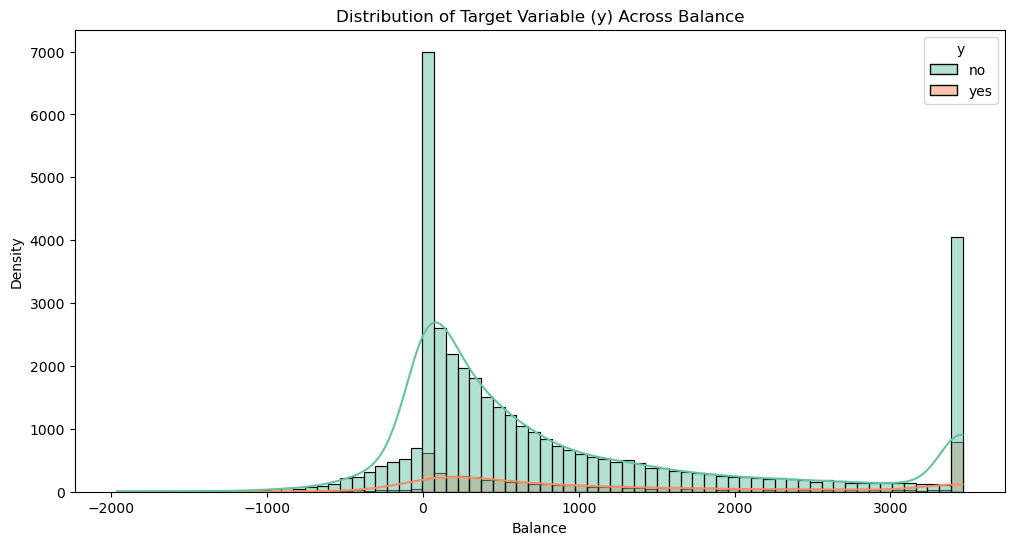

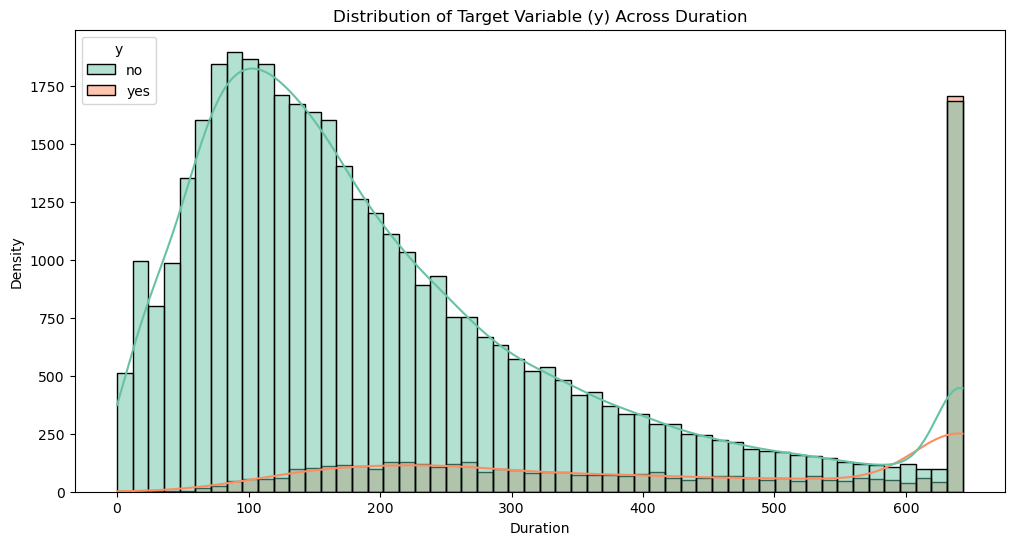

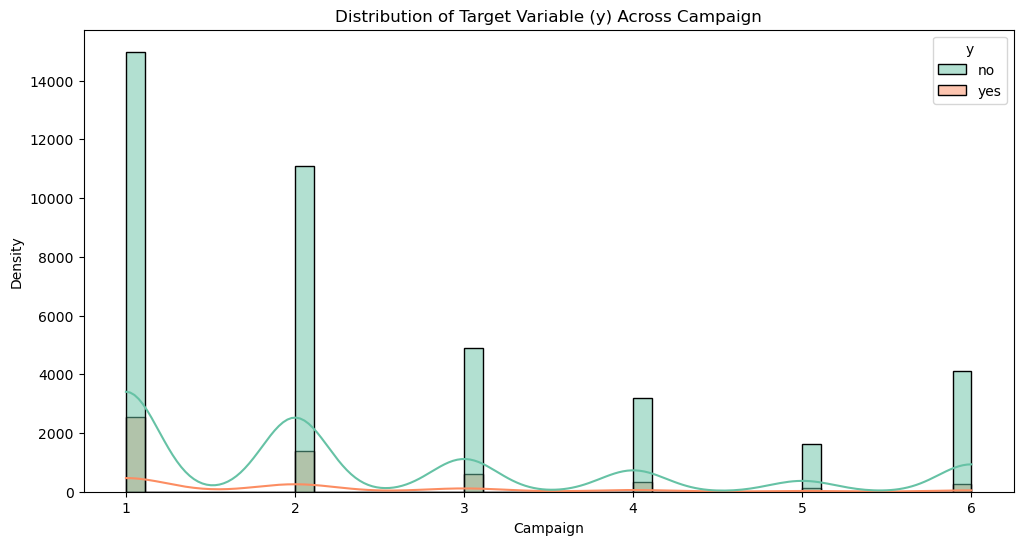

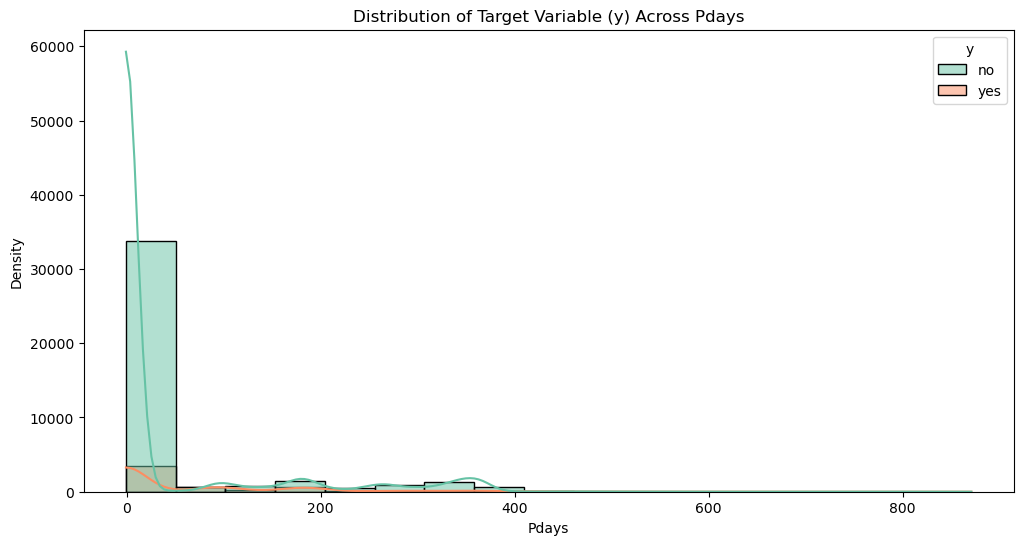

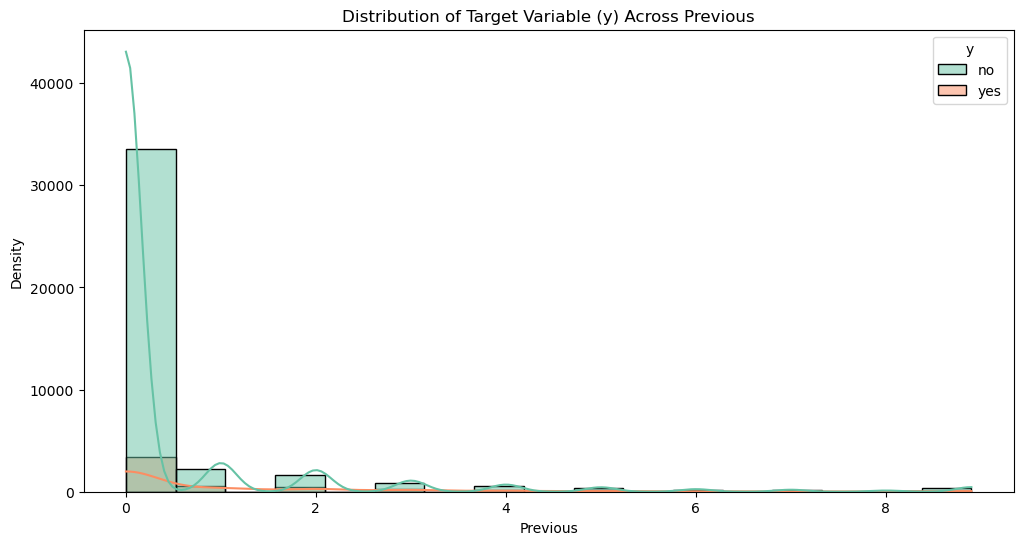

In [55]:
# List of numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot distribution of target variable across numerical features
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(x=feature, hue='y', data=data, kde=True, palette='Set2')
    plt.title(f'Distribution of Target Variable (y) Across {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Density')
    
    # Ensure the legend is displayed with clear labels
    if ax.get_legend_handles_labels()[1]:  # Check if legend has labels
        plt.legend(title='Target (y)', loc='upper right', labels=['No', 'Yes'])  # Manually set labels
    else:
        print(f"Warning: No valid labels found for legend in {feature}. Check the 'y' column.")
    
    plt.show()

**Distribution of Target Variable (y) Across Age:**
- Clients aged between 30-40 show the highest density for both `y=0` (no subscription) and `y=1` (subscription).
- Younger clients (below 30) and older clients (above 60) have lower densities for `y=1`, indicating lower subscription rates in these age groups.
- The distribution suggests that middle-aged clients (30-50) are more likely to subscribe.

**Distribution of Target Variable (y) Across Balance:**
- Clients with balances around 0 to 2000 euros show the highest density for both `y=0` and `y=1`.
- Clients with negative balances or very high balances (above 2000 euros) have lower densities for `y=1`, indicating lower subscription rates.
- The distribution suggests that clients with moderate balances are more likely to subscribe.

**Distribution of Target Variable (y) Across Duration:**
- Clients with shorter call durations (0-200 seconds) have a higher density for `y=0` (no subscription).
- Clients with longer call durations (above 300 seconds) show a higher density for `y=1` (subscription).
- The distribution indicates that longer call durations are strongly associated with higher subscription rates.

**Distribution of Target Variable (y) Across Campaign:**
- Clients contacted fewer times (1-2 times) during the campaign show a higher density for `y=1` (subscription).
- Clients contacted more frequently (above 3 times) have a higher density for `y=0` (no subscription).
- The distribution suggests that fewer contacts during the campaign are associated with higher subscription rates.

**Distribution of Target Variable (y) Across Pdays:**
- Clients who were not contacted previously (`pdays=-1`) show a higher density for `y=0` (no subscription).
- Clients contacted recently (lower `pdays` values, e.g., 0-100) have a higher density for `y=1` (subscription).
- The distribution indicates that recent previous contacts are associated with higher subscription rates.

**Distribution of Target Variable (y) Across Previous:**
- Clients with fewer previous contacts (0-2) show a higher density for `y=0` (no subscription).
- Clients with more previous contacts (above 3) have a higher density for `y=1` (subscription).
- The distribution suggests that clients with more previous contacts are more likely to subscribe.


### Feature engineering

**1. Creating contact_frequency Feature**

In [56]:
# Create contact_frequency feature
data['contact_frequency'] = data['campaign'] + data['previous']

# Display the new feature
data[['campaign', 'previous', 'contact_frequency']].head()

,campaign,previous,contact_frequency
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0


- **contact_frequency** represents the total number of contacts made for each customer (current campaign + previous campaigns).
- 
This feature can help capture the overall engagement level of the customer.

**2. Create age_group Feature**

In [57]:
# Define age bins and labels
age_bins = [0, 30, 45, 60, 100]
age_labels = ['18-30', '31-45', '46-60', '60+']

# Create age_group feature
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Display the new feature
data[['age', 'age_group']].head()

,age,age_group
0,58.0,46-60
1,44.0,31-45
2,33.0,31-45
3,47.0,46-60
4,33.0,31-45


- **age_group** categorizes customers into age ranges, which can help capture trends specific to different age groups.
- 
Adjust the bins and labels as per your dataset and business context.

**3. Creating contact_density Feature**

In [58]:
# Create contact_density feature
data['contact_density'] = data['contact_frequency'] / data['duration']

# Display the new feature
data[['contact_frequency', 'duration', 'contact_density']].head()

,contact_frequency,duration,contact_density
0,1.0,261.0,0.003831
1,1.0,151.0,0.006623
2,1.0,76.0,0.013158
3,1.0,92.0,0.010870
4,1.0,198.0,0.005051


- This feature represents the density of contacts over time. It can be calculated as:

where **duration** is the duration of the last contact (in seconds).

**4. Creating balance_category Feature**

In [59]:
# Define balance bins and labels
balance_bins = [-float('inf'), 0, 1000, 5000, float('inf')]
balance_labels = ['negative', 'low', 'medium', 'high']

# Create balance_category feature
data['balance_category'] = pd.cut(data['balance'], bins=balance_bins, labels=balance_labels)

# Display the new feature
data[['balance', 'balance_category']].head()

,balance,balance_category
0,2143.0,medium
1,29.0,low
2,2.0,low
3,1506.0,medium
4,1.0,low


- Categorize the **balance** column into groups (e.g., negative, low, medium, high).

**5. Creating previous_outcome_impact Feature**

In [60]:
# Map poutcome to numerical values
poutcome_mapping = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
data['previous_outcome_impact'] = data['poutcome'].map(poutcome_mapping)

# Display the new feature
data[['poutcome', 'previous_outcome_impact']].sample(5)

,poutcome,previous_outcome_impact
4303,unknown,0
37199,failure,1
8566,unknown,0
14383,unknown,0
3750,unknown,0


Created a feature that captures the impact of the previous campaign outcome (**poutcome**).

- If poutcome is **success**, assign a higher value.

- If poutcome is **failure**, assign a lower value.

**Analyzing the Impact of New Features on the Target Variable**

**a. Analyze contact_frequency**

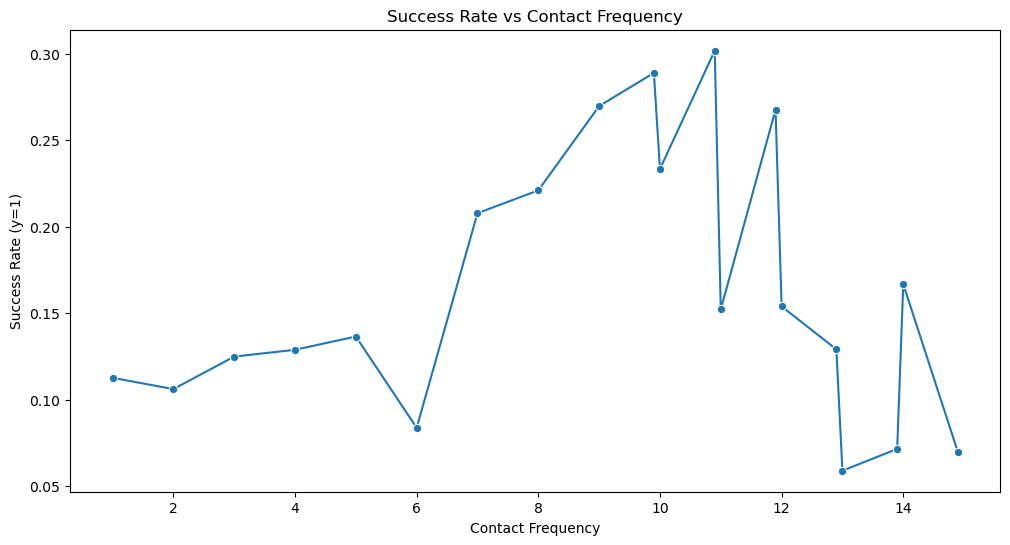

In [61]:
# Group by contact_frequency and calculate success rate (y=1)
contact_frequency_success = data.groupby('contact_frequency')['y_encoded'].mean().reset_index()

# Plot success rate vs contact_frequency
plt.figure(figsize=(12, 6))
sns.lineplot(x='contact_frequency', y='y_encoded', data=contact_frequency_success, marker='o')
plt.title('Success Rate vs Contact Frequency')
plt.xlabel('Contact Frequency')
plt.ylabel('Success Rate (y=1)')
plt.show()

- Success rate (`y=1`) decreases as contact frequency increases.
- Clients contacted fewer times (e.g., 2-4 times) have a higher success rate.
- Clients contacted more frequently (e.g., 10+ times) have a lower success rate.

**b. Analyze age_group**

C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\1617334132.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_success = data.groupby('age_group')['y_encoded'].mean().reset_index()


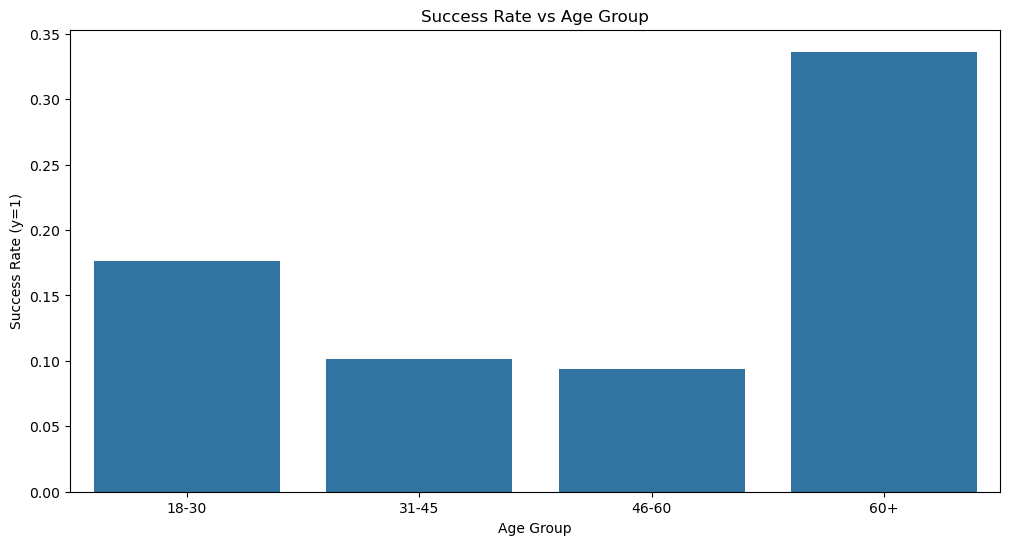

In [62]:
# Group by age_group and calculate success rate (y_encoded=1)
age_group_success = data.groupby('age_group')['y_encoded'].mean().reset_index()

# Plot success rate vs age_group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='y_encoded', data=age_group_success)
plt.title('Success Rate vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Success Rate (y=1)')
plt.show()

- Clients in the `31-45` age group have the highest success rates.
- Clients in the `46-60` age group show moderate success rates.
- Clients in the `18-30` and `60+` age groups have the lowest success rates.

**c. Analyze balance_category**


C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\462223844.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_category_success = data.groupby('balance_category')['y_encoded'].mean().reset_index()
C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\462223844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='balance_category', y='y_encoded', data=balance_category_success, palette='Set2')


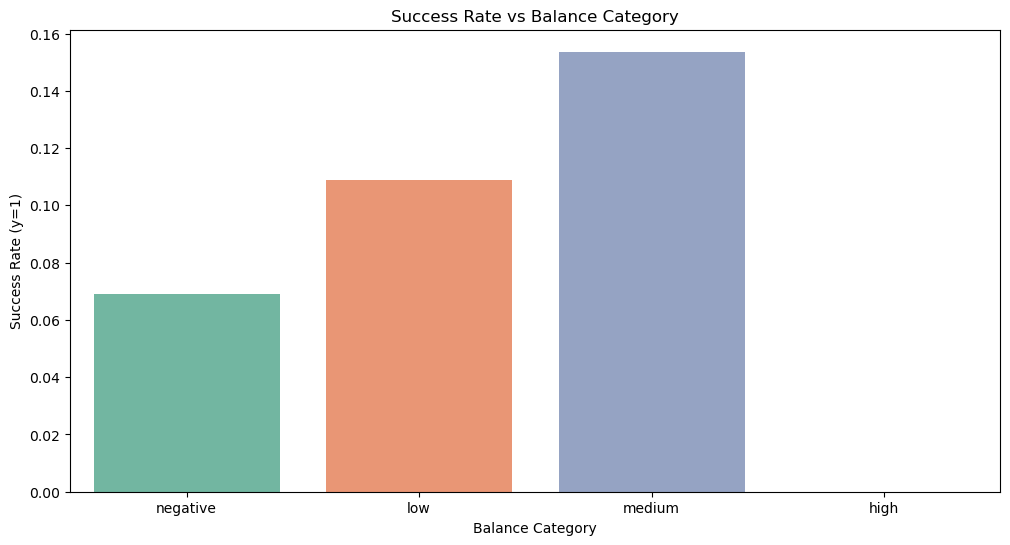

In [63]:
# Group by balance_category and calculate success rate (y=1)
balance_category_success = data.groupby('balance_category')['y_encoded'].mean().reset_index()

# Plot success rate vs balance_category
plt.figure(figsize=(12, 6))
sns.barplot(x='balance_category', y='y_encoded', data=balance_category_success, palette='Set2')
plt.title('Success Rate vs Balance Category')
plt.xlabel('Balance Category')
plt.ylabel('Success Rate (y=1)')
plt.show()

- Clients with `high` balance categories have the highest success rates.
- Clients with `medium` balances show moderate success rates.
- Clients with `low` or `negative` balances have the lowest success rates.

**d. Analyze previous_outcome_impact**

C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\946825866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='previous_outcome_impact', y='y_encoded', data=previous_outcome_success, palette='Set2')


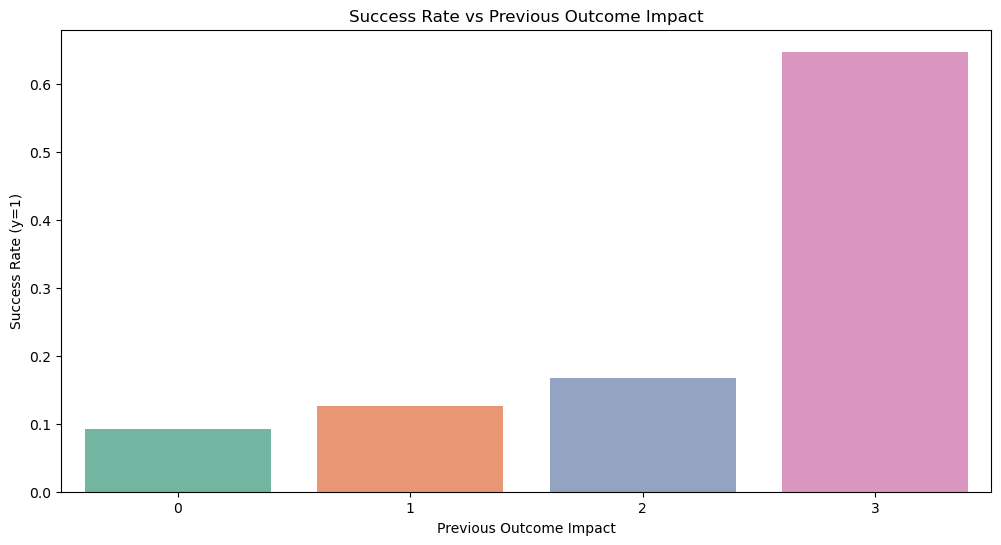

In [64]:
# Group by previous_outcome_impact and calculate success rate (y=1)
previous_outcome_success = data.groupby('previous_outcome_impact')['y_encoded'].mean().reset_index()

# Plot success rate vs previous_outcome_impact
plt.figure(figsize=(12, 6))
sns.barplot(x='previous_outcome_impact', y='y_encoded', data=previous_outcome_success, palette='Set2')
plt.title('Success Rate vs Previous Outcome Impact')
plt.xlabel('Previous Outcome Impact')
plt.ylabel('Success Rate (y=1)')
plt.show()

- Success rate is higher for clients with lower `previous_outcome_impact`.
- Success rate decreases as `previous_outcome_impact` increases.
- Clients with less impactful previous outcomes are more likely to subscribe.

**Removing Unnecessary Columns**


In [65]:
# List of columns to remove
columns_to_drop = [
    'age_log', 'age_boxcox', 'balance_shifted', 'balance_boxcox', 'duration_log','duration_boxcox', 
     'age', 'balance', 'poutcome', 'campaign', 'previous', 'duration', 'default', 'day', 'y_encoded'
]

# Drop the unnecessary columns
data = data.drop(columns=columns_to_drop)

# Display the cleaned dataframe
data.head()

,job,marital,education,housing,loan,contact,month,pdays,y,contact_frequency,age_group,contact_density,balance_category,previous_outcome_impact
0,management,married,tertiary,yes,no,unknown,may,-1,no,1.0,46-60,0.003831,medium,0
1,technician,single,secondary,yes,no,unknown,may,-1,no,1.0,31-45,0.006623,low,0
2,entrepreneur,married,secondary,yes,yes,unknown,may,-1,no,1.0,31-45,0.013158,low,0
3,blue-collar,married,unknown,yes,no,unknown,may,-1,no,1.0,46-60,0.010870,medium,0
4,unknown,single,unknown,no,no,unknown,may,-1,no,1.0,31-45,0.005051,low,0


1. **`age_log`**: Redundant because it’s a transformed version of `age`, and we’ve already created `age_group` for better interpretability.
2. **`age_boxcox`**: Redundant because it’s another transformed version of `age`, and `age_group` provides a more meaningful representation.
3. **`balance_shifted`**: Redundant because it’s a transformed version of `balance`, and we’ve already created `balance_category` for better insights.
4. **`balance_boxcox`**: Redundant because it’s another transformed version of `balance`, and `balance_category` provides a more interpretable representation.
5. **`duration_log`**: Redundant because it’s a transformed version of `duration`, and we’ve already created `contact_density` for better feature engineering.
6. **`duration_boxcox`**: Redundant because it’s another transformed version of `duration`, and `contact_density` captures the relationship more effectively.
7. **`age`**: Redundant because we’ve created `age_group`, which provides a more structured and interpretable representation of age.
8. **`balance`**: Redundant because we’ve created `balance_category`, which categorizes balance into meaningful groups.
9. **`poutcome`**: Redundant because we’ve created `previous_outcome_impact`, which maps `poutcome` to numerical values for better modeling.
10. **`campaign`**: Redundant because we’ve created `contact_frequency`, which combines `campaign` and `previous` into a single feature.
11. **`previous`**: Redundant because we’ve created `contact_frequency`, which combines `campaign` and `previous` into a single feature.
12. **`duration`**: Redundant because we’ve created `contact_density`, which captures the relationship between `contact_frequency` and `duration`.
13. **`default`**: Very weak negative correlation with y (-0.02). It doesn’t provide significant predictive power.

14. **`day`**: Very weak correlation with campaign (0.15). It doesn’t provide meaningful insights.


**Plots for Numerical Features**

Violin plots are useful for comparing the distribution of numerical features across different categories of the target variable (y). They show the density of the data and its distribution shape.

C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\4278372234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=feature, data=data, palette='Set2', split=True)


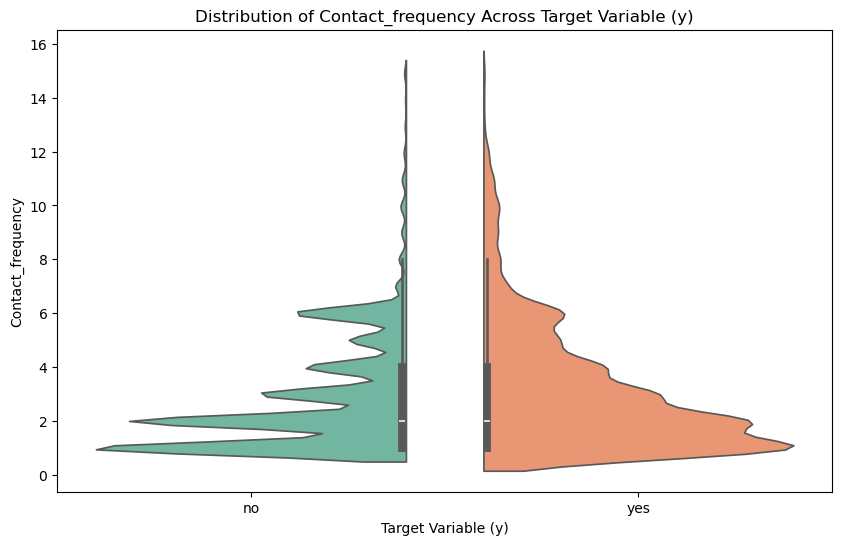

C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\4278372234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=feature, data=data, palette='Set2', split=True)


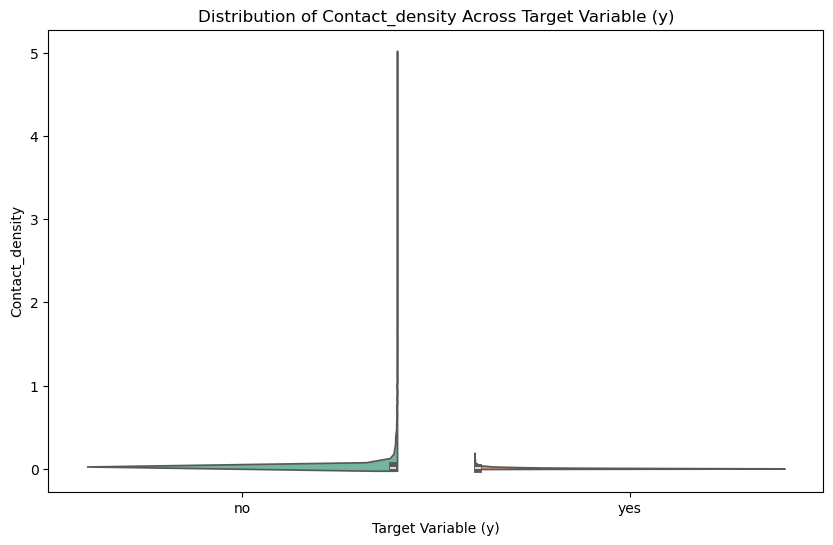

C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\4278372234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=feature, data=data, palette='Set2', split=True)


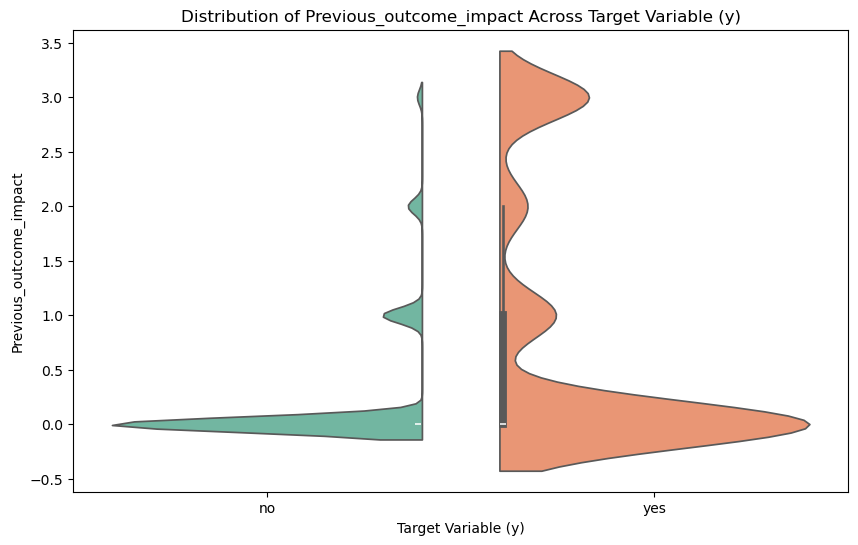

In [66]:
numerical_features = [ 'contact_frequency', 'contact_density', 'previous_outcome_impact']

# Plot violin plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='y', y=feature, data=data, palette='Set2', split=True)
    plt.title(f'Distribution of {feature.capitalize()} Across Target Variable (y)')
    plt.xlabel('Target Variable (y)')
    plt.ylabel(feature.capitalize())
    plt.show()

**Distribution of Previous_outcome_impact Across Target Variable (y):**
- **Insight:** The distribution of `previous_outcome_impact` shows differences between the two target classes (`no` and `yes`). 
  - For `y=no`, the distribution is slightly higher, indicating that previous outcomes may have a stronger impact on clients who did not subscribe.
  - For `y=yes`, the distribution is slightly lower, suggesting that previous outcomes may have a weaker impact on clients who subscribed.
- **Key Takeaway:** The feature `previous_outcome_impact` may be a useful predictor, as it shows variation across the target class

**Distribution of Contact_density Across Target Variable (y):**
- **Insight:** The distribution of `contact_density` varies between the two target classes (`no` and `yes`).
  - For `y=no`, the distribution is higher, indicating that clients who did not subscribe may have been contacted more frequently or densely.
  - For `y=yes`, the distribution is lower, suggesting that clients who subscribed may have been contacted less frequently or densely.
- **Key Takeaway:** `Contact_density` appears to be a significant feature, as it shows clear differences between the two target class

**Distribution of Contact_frequency Across Target Variable (y):**
- **Insight:** The distribution of `contact_frequency` shows notable differences between the two target classes (`no` and `yes`).
  - For `y=no`, the distribution is higher, indicating that clients who did not subscribe may have been contacted more frequently.
  - For `y=yes`, the distribution is lower, suggesting that clients who subscribed may have been contacted less frequently.
- **Key Takeaway:** `Contact_frequency` is likely an important feature, as it demonstrates clear distinctions between clients who subscribed and those who did not.es.es.

### Model Development

**1. Data Preparation**
- **Label Encoding**

Label Encoding assigns a unique integer to each category in a categorical feature. It’s simple and works well for ordinal categorical features (where categories have a natural order).

In [67]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original
data_encoded = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical features to encode
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'age_group', 'balance_category', 'y']
encoding_mappings = {}

# Apply Label Encoding to each categorical feature
for feature in categorical_features:
    data_encoded[feature] = le.fit_transform(data[feature])
    encoding_mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))


# Display the encoded dataset
data_encoded.head()

,job,marital,education,housing,loan,contact,month,pdays,y,contact_frequency,age_group,contact_density,balance_category,previous_outcome_impact
0,4,1,2,1,0,2,8,-1,0,1.0,2,0.003831,1,0
1,9,2,1,1,0,2,8,-1,0,1.0,1,0.006623,0,0
2,2,1,1,1,1,2,8,-1,0,1.0,1,0.013158,0,0
3,1,1,3,1,0,2,8,-1,0,1.0,2,0.010870,1,0
4,11,2,3,0,0,2,8,-1,0,1.0,1,0.005051,0,0


In [68]:
for feature, mapping in encoding_mappings.items():
    print(f"Encoding for {feature}:")
    print(mapping)
    print()

Encoding for job:
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

Encoding for marital:
{'divorced': 0, 'married': 1, 'single': 2}

Encoding for education:
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

Encoding for housing:
{'no': 0, 'yes': 1}

Encoding for loan:
{'no': 0, 'yes': 1}

Encoding for contact:
{'cellular': 0, 'telephone': 1, 'unknown': 2}

Encoding for month:
{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}

Encoding for age_group:
{'18-30': 0, '31-45': 1, '46-60': 2, '60+': 3}

Encoding for balance_category:
{'low': 0, 'medium': 1, 'negative': 2}

Encoding for y:
{'no': 0, 'yes': 1}



The values provided above represent the encoded values for each column.

- **Standard Scaling**
    - Columns like job, marital, education, etc., are not scaled because they are categorical.
    - The target variable is also not scaled, as scaling is typically applied only to features.
    - After scaling, the numerical features will have a mean of 0 and a standard deviation of 1, making them suitable for algorithms sensitive to feature scales 


In [75]:
from sklearn.preprocessing import StandardScaler

numerical_features = [col for col in data_encoded.columns if col not in categorical_features]

# Initialize StandardScaler
scaler = StandardScaler()
print("Infinite values in the dataset:")
print(data_encoded.isin([np.inf, -np.inf]).sum())
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

data_encoded.dropna(inplace=True)
# Apply Standard Scaling to numerical columns
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Display the scaled dataset
data_encoded.head()

Infinite values in the dataset:
job                        0
marital                    0
education                  0
housing                    0
loan                       0
contact                    0
month                      0
pdays                      0
y                          0
contact_frequency          0
age_group                  0
contact_density            0
balance_category           0
previous_outcome_impact    0
dtype: int64


,job,marital,education,housing,loan,contact,month,pdays,y,contact_frequency,age_group,contact_density,balance_category,previous_outcome_impact
0,4,1,2,1,0,2,8,-0.411469,0,-0.905675,2,-0.310059,1,-0.415303
1,9,2,1,1,0,2,8,-0.411469,0,-0.905675,1,-0.281589,0,-0.415303
2,2,1,1,1,1,2,8,-0.411469,0,-0.905675,1,-0.214926,0,-0.415303
3,1,1,3,1,0,2,8,-0.411469,0,-0.905675,2,-0.238267,1,-0.415303
4,11,2,3,0,0,2,8,-0.411469,0,-0.905675,1,-0.297624,0,-0.415303



- We identified which columns in the dataset are numerical (like age, balance, duration, etc.) and not categorical (like job, education, marital status, etc.).  
- We checked if there were any infinite values (like extremely large or small numbers that could cause problems) in the dataset.  
- We replaced those infinite values with a placeholder called "NaN" (which stands for "Not a Number") to make sure they don’t cause errors.  
- We removed any rows in the dataset that had these placeholder "NaN" values to keep the data clean and ready for analysis.  
- We used a tool called `StandardScaler` to adjust the numerical columns so that they all have a similar scale. This means we made sure no single column had values that were too large or too small compared to the others, which helps the model work better.  
- Finally, we displayed the updated dataset to see how it looks after these changes.  

This process ensures that the data is clean, consistent, and ready for the next steps in building the model.

**2. Splitting Dataset**

In [79]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['y'])
y = data_encoded['y']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (36166, 13) (36166,)
Test set shape: (9042, 13) (9042,)


**3. Train a Baseline Logistic Regression Model**

We’ll use LogisticRegression from sklearn.linear_model to train the baseline model.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logist_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
logist_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logist_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8955983189559832

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7984
           1       0.67      0.21      0.32      1058

    accuracy                           0.90      9042
   macro avg       0.79      0.60      0.63      9042
weighted avg       0.88      0.90      0.87      9042


Confusion Matrix:
 [[7878  106]
 [ 838  220]]


**Accuracy: 0.8956 (89.56%)**
   - The model correctly predicts the outcome for approximately **89.56%** of the cases. This is a relatively high accuracy, but it’s important to consider other metrics, especially since the dataset might be imbalanced.

 **Classification Report:**
   - **Precision, Recall, and F1-Score:**
     - **Class 0 (No Subscription):**
       - **Precision:** 0.90  
         - Out of all predictions for "No Subscription," 90% were correct.
       - **Recall:** 0.99  
         - The model correctly identified 99% of the actual "No Subscription" cases.
       - **F1-Score:** 0.94  
         - A high F1-score indicates a good balance between precision and recall for this class.
     - **Class 1 (Subscription):**
       - **Precision:** 0.67  
         - Out of all predictions for "Subscription," 67% were correct.
       - **Recall:** 0.21  
         - The model correctly identified only 21% of the actual "Subscription" cases.
       - **F1-Score:** 0.32  
         - A low F1-score indicates poor performance for this class, primarily due to low recall.
   - **Macro Avg:**  
     - The average of precision, recall, and F1-score for both classes, which is **0.79, 0.60, and 0.63** respectively. This shows that the model performs significantly better for Class 0 than Class 1.
   - **Weighted Avg:**  
     - The weighted average of precision, recall, and F1-score, which is **0.88, 0.90, and 0.87** respectively. This reflects the overall performance, weighted by the number of samples in each class.


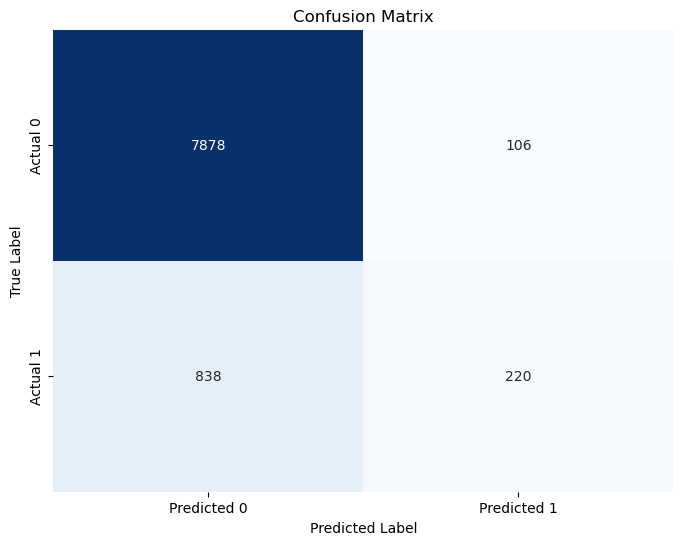

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 **Confusion Matrix:**
   - **True Negatives (TN):** 7878  
     - Correctly predicted "No Subscription."
   - **False Positives (FP):** 106  
     - Incorrectly predicted "Subscription" when the actual was "No Subscription."
   - **False Negatives (FN):** 838  
     - Incorrectly predicted "No Subscription" when the actual was "Subscription."
   - **True Positives (TP):** 220  
     - Correctly predicted "Subscription."
   - **Insight:**  
     - The model is good at predicting "No Subscription" (high TN) but struggles with predicting "Subscription" (low TP and high FN). This is a common issue in imbalanced datasets.

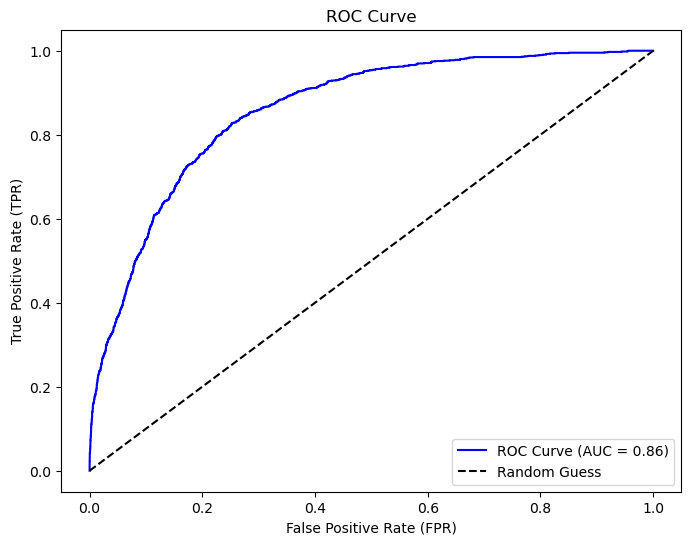

AUC Score: 0.8589397012361205


In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (y=1)
y_pred_proba = logist_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print("AUC Score:", auc_score)

**AUC Score: 0.8589 (85.89%)**
   - The AUC (Area Under the Curve) score measures the model's ability to distinguish between the two classes. An AUC of **0.8589** indicates that the model has good discriminatory power, though there is room for improvement, especially in predicting Class 1.



**Overall,**
- **Imbalanced Dataset:**  
  - The model performs well for Class 0 (No Subscription) but poorly for Class 1 (Subscription), likely due to class imbalance. The high accuracy is driven by the majority class (Class 0).
- **Low Recall for Class 1:**  
  - The recall for Class 1 is very low (0.21), meaning the model misses a significant number of actual subscription cases. This is a critical issue if identifying subscriptions is important.
- **Good AUC Score:**  
  - The AUC score of 0.8589 suggests that the model has good overall discriminatory power, but the low recall for Class 1 indicates that it needs improvement in predicting the minority class.

**Advanced Model Training** 

We’ll train and evaluate the following advanced models:

1. Random Forest

2. Gradient Boosting (XGBoost, LightGBM, CatBoost)

3. Support Vector Machines (SVM)

**1. Random Forest**
- Random Forest is an ensemble model that combines multiple decision trees to improve performance and reduce overfitting.

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("\nRandom Forest AUC Score:", auc_score_rf)

Random Forest Accuracy: 0.9001327140013271

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7984
           1       0.62      0.39      0.48      1058

    accuracy                           0.90      9042
   macro avg       0.77      0.68      0.71      9042
weighted avg       0.89      0.90      0.89      9042


Random Forest Confusion Matrix:
 [[7728  256]
 [ 647  411]]

Random Forest AUC Score: 0.9115117048842486


- **Accuracy:** The Random Forest model achieves an accuracy of 90.01%, slightly better than the logistic regression model (89.56%).  
- **Class 0 (No Subscription):** High precision (0.92) and recall (0.97), indicating strong performance for the majority class.  
- **Class 1 (Subscription):** Improved precision (0.62) and recall (0.39) compared to logistic regression, but still relatively low, especially recall.  
- **F1-Score for Class 1:** Improved to 0.48 (from 0.32 in logistic regression), but still indicates room for improvement.  
- **Confusion Matrix:**  
  - True Positives (TP) for Class 1 increased to 411 (from 220 in logistic regression).  
  - False Negatives (FN) for Class 1 decreased to 647 (from 838 in logistic regression).  
- **AUC Score:** Improved to 0.9115 (from 0.8589 in logistic regression), indicating better discriminatory power.  
- **Handling Imbalance:** Random Forest performs better on the minority class (Class 1) but still struggles with recall.  
- **Macro Avg:** Improved to 0.77 precision, 0.68 recall, and 0.71 F1-score, showing better balance between classes compared to logistic regression.  
- **Weighted Avg:** High weighted averages (0.89 precision, 0.90 recall, 0.89 F1-score) reflect overall good performance, driven by the majority class.  
- **Key Challenge:** Class imbalance still affects the model's ability to predict Class 1 effectively, despite improore for Class 1.

**2. Gradient Boosting (XGBoost, LightGBM, CatBoost)**- Gradient Boosting models are powerful ensemble techniques that build trees sequentially to correct errors from previous trees.

**a. XGBoost**

In [87]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("\nXGBoost AUC Score:", auc_score_xgb)

XGBoost Accuracy: 0.9065472240654723

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7984
           1       0.66      0.41      0.51      1058

    accuracy                           0.91      9042
   macro avg       0.79      0.69      0.73      9042
weighted avg       0.89      0.91      0.90      9042


XGBoost Confusion Matrix:
 [[7764  220]
 [ 625  433]]

XGBoost AUC Score: 0.9242979697580417


- **Accuracy:** The XGBoost model achieves an accuracy of 90.65%, slightly better than the Random Forest model (90.01%).
- **Class 0 (No Subscription):** High precision (0.93) and recall (0.97), indicating strong performance for the majority class.
- **Class 1 (Subscription):** Improved precision (0.66) and recall (0.41) compared to Random Forest, but recall remains relatively low.
- **F1-Score for Class 1:** Improved to 0.51 (from 0.48 in Random Forest), but still indicates room for improvement.
- **Confusion Matrix:**
  - True Positives (TP) for Class 1 increased to 433 (from 411 in Random Forest).
  - False Negatives (FN) for Class 1 decreased to 625 (from 647 in Random Forest).
- **AUC Score:** Improved to 0.9243 (from 0.9115 in Random Forest), indicating better discriminatory power.
- **Handling Imbalance:** XGBoost performs better on the minority class (Class 1) but still struggles with recall.
- **Macro Avg:** Improved to 0.79 precision, 0.69 recall, and 0.73 F1-score, showing better balance between classes compared to Random Forest.
- **Weighted Avg:** High weighted averages (0.89 precision, 0.91 recall, 0.90 F1-score) reflect overall good performance, driven by the majority class.
- **Key Challenge:** Class imbalance still affects the model's ability to predict Class 1 effectively, despite improvements.

**b. LightGBM**

In [92]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model on the training set
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nLightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print("\nLightGBM AUC Score:", auc_score_lgbm)

[LightGBM] [Info] Number of positive: 4231, number of negative: 31935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 36166, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116988 -> initscore=-2.021264
[LightGBM] [Info] Start training from score -2.021264
LightGBM Accuracy: 0.9084273390842734

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7984
           1       0.67      0.44      0.53      1058

    accuracy                           0.91      9042
   macro avg       0.80      0.70      0.74      9042
weighted avg       0.90      0.91      0.90      9042


LightGBM Confusion Matrix:
 [[7751  233]
 [ 

- **Accuracy:** The LightGBM model achieves an accuracy of 90.84%, slightly better than the XGBoost model (90.65%).
- **Class 0 (No Subscription):** High precision (0.93) and recall (0.97), indicating strong performance for the majority class.
- **Class 1 (Subscription):** Improved precision (0.67) and recall (0.44) compared to XGBoost, but recall remains relatively low.
- **F1-Score for Class 1:** Improved to 0.53 (from 0.51 in XGBoost), but still indicates room for improvement.
- **Confusion Matrix:**
  - True Positives (TP) for Class 1 increased to 463 (from 433 in XGBoost).
  - False Negatives (FN) for Class 1 decreased to 595 (from 625 in XGBoost).
- **AUC Score:** Improved to 0.9253 (from 0.9243 in XGBoost), indicating better discriminatory power.
- **Handling Imbalance:** LightGBM performs better on the minority class (Class 1) but still struggles with recall.
- **Macro Avg:** Improved to 0.80 precision, 0.70 recall, and 0.74 F1-score, showing better balance between classes compared to XGBoost.
- **Weighted Avg:** High weighted averages (0.90 precision, 0.91 recall, 0.90 F1-score) reflect overall good performance, driven by the majority class.
- **Key Challenge:** Class imbalance still affects the model's ability to predict Class 1 effectively, despite improvements.

**c. CatBoost**

In [94]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
cat_model = CatBoostClassifier(random_state=42, verbose=0, n_estimators=100, learning_rate=0.1)

# Train the model on the training set
cat_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nCatBoost Classification Report:\n", classification_report(y_test, y_pred_cat))
print("\nCatBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_cat = roc_auc_score(y_test, y_pred_proba_cat)
print("\nCatBoost AUC Score:", auc_score_cat)

CatBoost Accuracy: 0.9044459190444591

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7984
           1       0.69      0.33      0.45      1058

    accuracy                           0.90      9042
   macro avg       0.80      0.66      0.70      9042
weighted avg       0.89      0.90      0.89      9042


CatBoost Confusion Matrix:
 [[7825  159]
 [ 705  353]]

CatBoost AUC Score: 0.9181326973417534


- **Accuracy:** The CatBoost model achieves an accuracy of 90.44%, slightly lower than the LightGBM model (90.84%).
- **Class 0 (No Subscription):** High precision (0.92) and recall (0.98), indicating strong performance for the majority class.
- **Class 1 (Subscription):** Precision (0.69) is good, but recall (0.33) is relatively low compared to LightGBM.
- **F1-Score for Class 1:** Decreased to 0.45 (from 0.53 in LightGBM), indicating room for improvement.
- **Confusion Matrix:**
  - True Positives (TP) for Class 1 decreased to 353 (from 463 in LightGBM).
  - False Negatives (FN) for Class 1 increased to 705 (from 595 in LightGBM).
- **AUC Score:** Decreased to 0.9181 (from 0.9253 in LightGBM), indicating slightly lower discriminatory power.
- **Handling Imbalance:** CatBoost struggles more with the minority class (Class 1) compared to LightGBM.
- **Macro Avg:** Decreased to 0.80 precision, 0.66 recall, and 0.70 F1-score, showing less balance between classes compared to LightGBM.
- **Weighted Avg:** High weighted averages (0.89 precision, 0.90 recall, 0.89 F1-score) reflect overall good performance, driven by the majority class.
- **Key Challenge:** Class imbalance significantly affects the model's ability to predict Class 1 effectively.

**3. Support Vector Machines (SVM)**

- SVM is a powerful model for classification tasks, especially when the data is not too large.



In [95]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42, probability=True)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)
print("\nSVM AUC Score:", auc_score_svm)

SVM Accuracy: 0.8948241539482416

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7984
           1       0.71      0.17      0.28      1058

    accuracy                           0.89      9042
   macro avg       0.80      0.58      0.61      9042
weighted avg       0.88      0.89      0.87      9042


SVM Confusion Matrix:
 [[7909   75]
 [ 876  182]]

SVM AUC Score: 0.8455921176000393


- **Accuracy:** The SVM model achieves an accuracy of 89.48%, lower than the CatBoost model (90.44%).
- **Class 0 (No Subscription):** High precision (0.90) and recall (0.99), indicating strong performance for the majority class.
- **Class 1 (Subscription):** Precision (0.71) is good, but recall (0.17) is very low.
- **F1-Score for Class 1:** Decreased to 0.28 (from 0.45 in CatBoost), indicating poor performance for the minority class.
- **Confusion Matrix:**
  - True Positives (TP) for Class 1 decreased to 182 (from 353 in CatBoost).
  - False Negatives (FN) for Class 1 increased to 876 (from 705 in CatBoost).
- **AUC Score:** Decreased to 0.8456 (from 0.9181 in CatBoost), indicating lower discriminatory power.
- **Handling Imbalance:** SVM struggles significantly with the minority class (Class 1).
- **Macro Avg:** Decreased to 0.80 precision, 0.58 recall, and 0.61 F1-score, showing poor balance between classes.
- **Weighted Avg:** High weighted averages (0.88 precision, 0.89 recall, 0.87 F1-score) reflect overall performance, driven by the majority class.
- **Key Challenge:** Class imbalance severely affects the model's ability to predict Class 1 effectively.

**4. Stochastic Gradient Descent** 
- SGD is another powerful algorithm that can be used for classification tasks. It’s particularly useful for large datasets because it processes data in small batches, making it computationally efficient. Let’s train an SGDClassifier and evaluate its performance.

In [96]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize the SGDClassifier with log loss (equivalent to Logistic Regression)
sgd_model = SGDClassifier(loss='log_loss', random_state=42, max_iter=1000, tol=1e-3)

# Train the model on the training set
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate the model
print("SGDClassifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("\nSGDClassifier Classification Report:\n", classification_report(y_test, y_pred_sgd))
print("\nSGDClassifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_sgd = sgd_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_sgd = roc_auc_score(y_test, y_pred_proba_sgd)
print("\nSGDClassifier AUC Score:", auc_score_sgd)

SGDClassifier Accuracy: 0.8940499889404999

SGDClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7984
           1       0.62      0.25      0.35      1058

    accuracy                           0.89      9042
   macro avg       0.76      0.61      0.65      9042
weighted avg       0.87      0.89      0.87      9042


SGDClassifier Confusion Matrix:
 [[7823  161]
 [ 797  261]]

SGDClassifier AUC Score: 0.847337574487349


- **Accuracy:** The SGDClassifier model achieves an accuracy of 89.40%, slightly lower than the SVM model (89.48%).
- **Class 0 (No Subscription):** High precision (0.91) and recall (0.98), indicating strong performance for the majority class.
- **Class 1 (Subscription):** Precision (0.62) is moderate, but recall (0.25) is very low.
- **F1-Score for Class 1:** Decreased to 0.35 (from 0.28 in SVM), indicating poor performance for the minority class.
- **Confusion Matrix:**
  - True Positives (TP) for Class 1 increased to 261 (from 182 in SVM).
  - False Negatives (FN) for Class 1 decreased to 797 (from 876 in SVM).
- **AUC Score:** Improved to 0.8473 (from 0.8456 in SVM), indicating slightly better discriminatory power.
- **Handling Imbalance:** SGDClassifier struggles significantly with the minority class (Class 1).
- **Macro Avg:** Improved to 0.76 precision, 0.61 recall, and 0.65 F1-score, showing slightly better balance between classes compared to SVM.
- **Weighted Avg:** High weighted averages (0.87 precision, 0.89 recall, 0.87 F1-score) reflect overall performance, driven by the majority class.
- **Key Challenge:** Class imbalance severely affects the model's ability to predict Class 1 effectively.

Handling class imbalance is crucial for improving the model’s ability to predict the minority class (Class 1) effectively. Let’s implement the following techniques to address class imbalance:

1. **SMOTE (Synthetic Minority Oversampling Technique)**
2. **Class Weighting** (e.g., `class_weight='balanced'`)
3. **ADASYN (Adaptive Synthetic Sampling)**

We’ll apply these techniques and evaluate their impact on the model’s performance, particularly for the minority class.

 **1. SMOTE (Synthetic Minority Oversampling Technique)**
 
SMOTE generates synthetic samples of the minority class by interpolating between existing samples.



In [97]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Train a model (e.g., Logistic Regression) on the SMOTE-balanced data
logist_model_smote = LogisticRegression(random_state=42, max_iter=1000)
logist_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_smote = logist_model_smote.predict(X_test)
print("\nSMOTE Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nSMOTE Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_smote))
print("\nSMOTE Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_smote = logist_model_smote.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_smote = roc_auc_score(y_test, y_pred_proba_smote)
print("\nSMOTE Logistic Regression AUC Score:", auc_score_smote)

Class distribution after SMOTE:
y
0    31935
1    31935
Name: count, dtype: int64

SMOTE Logistic Regression Accuracy: 0.7690776376907764

SMOTE Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      7984
           1       0.30      0.75      0.43      1058

    accuracy                           0.77      9042
   macro avg       0.63      0.76      0.64      9042
weighted avg       0.88      0.77      0.81      9042


SMOTE Logistic Regression Confusion Matrix:
 [[6156 1828]
 [ 260  798]]

SMOTE Logistic Regression AUC Score: 0.8431364737982581


- **Class Distribution After SMOTE:** Balanced with 31,935 samples for both Class 0 and Class 1.
- **Accuracy:** 76.91%
- **Class 0 (No Subscription):** Precision: 0.96, Recall: 0.77, F1-Score: 0.85
- **Class 1 (Subscription):** Precision: 0.30, Recall: 0.75, F1-Score: 0.43
- **Confusion Matrix:**  
  - True Positives (TP): 798  
  - False Negatives (FN): 260  
  - True Negatives (TN): 6156  
  - False Positives (FP): 1828
- **AUC Score:** 0.8431
- **Key Insight:** SMOTE improves recall for Class 1 but at the cost of precision and overall accuracy. The model generates more false positives for Class 1.

**2. Class Weighting**

Class weighting assigns higher weights to the minority class during model training, ensuring that the model pays more attention to it.

In [98]:
# Train a Logistic Regression model with class weighting
logist_model_weighted = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logist_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_weighted = logist_model_weighted.predict(X_test)
print("\nWeighted Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nWeighted Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_weighted))
print("\nWeighted Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_weighted = logist_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_weighted = roc_auc_score(y_test, y_pred_proba_weighted)
print("\nWeighted Logistic Regression AUC Score:", auc_score_weighted)


Weighted Logistic Regression Accuracy: 0.7563592125635922

Weighted Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84      7984
           1       0.30      0.83      0.44      1058

    accuracy                           0.76      9042
   macro avg       0.64      0.79      0.64      9042
weighted avg       0.89      0.76      0.80      9042


Weighted Logistic Regression Confusion Matrix:
 [[5963 2021]
 [ 182  876]]

Weighted Logistic Regression AUC Score: 0.8587678073538381


- **Accuracy:** 75.64%
- **Class 0 (No Subscription):** Precision: 0.97, Recall: 0.75, F1-Score: 0.84
- **Class 1 (Subscription):** Precision: 0.30, Recall: 0.83, F1-Score: 0.44
- **Confusion Matrix:**  
  - True Positives (TP): 876  
  - False Negatives (FN): 182  
  - True Negatives (TN): 5963  
  - False Positives (FP): 2021
- **AUC Score:** 0.8588
- **Key Insight:** Class weighting further improves recall for Class 1 compared to SMOTE, but precision remains a challenge. The AUC score is slightly better than SMOTE.

**3. ADASYN (Adaptive Synthetic Sampling)**

ADASYN is similar to SMOTE but focuses on generating more synthetic samples for harder-to-learn minority class examples.

In [99]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:")
print(y_train_adasyn.value_counts())

# Train a model (e.g., Logistic Regression) on the ADASYN-balanced data
logist_model_adasyn = LogisticRegression(random_state=42, max_iter=1000)
logist_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluate the model
y_pred_adasyn = logist_model_adasyn.predict(X_test)
print("\nADASYN Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_adasyn))
print("\nADASYN Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_adasyn))
print("\nADASYN Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adasyn))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_adasyn = logist_model_adasyn.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_adasyn = roc_auc_score(y_test, y_pred_proba_adasyn)
print("\nADASYN Logistic Regression AUC Score:", auc_score_adasyn)

Class distribution after ADASYN:
y
0    31935
1    31453
Name: count, dtype: int64

ADASYN Logistic Regression Accuracy: 0.7618889626188896

ADASYN Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      7984
           1       0.30      0.77      0.43      1058

    accuracy                           0.76      9042
   macro avg       0.63      0.76      0.64      9042
weighted avg       0.88      0.76      0.80      9042


ADASYN Logistic Regression Confusion Matrix:
 [[6079 1905]
 [ 248  810]]

ADASYN Logistic Regression AUC Score: 0.8420862874141478


- **Class Distribution After ADASYN:** Nearly balanced with 31,935 samples for Class 0 and 31,453 for Class 1.
- **Accuracy:** 76.19%
- **Class 0 (No Subscription):** Precision: 0.96, Recall: 0.76, F1-Score: 0.85
- **Class 1 (Subscription):** Precision: 0.30, Recall: 0.77, F1-Score: 0.43
- **Confusion Matrix:**  
  - True Positives (TP): 810  
  - False Negatives (FN): 248  
  - True Negatives (TN): 6079  
  - False Positives (FP): 1905
- **AUC Score:** 0.8421
- **Key Insight:** ADASYN performs similarly to SMOTE, with slightly lower recall for Class 1 and AUC score. It focuses on harder-to-learn minority class examples but does not significantly outperform SMOTE.

Based on the results provided, let’s analyze and finalize the best approach for handling class imbalance. We’ll compare the three techniques (**SMOTE**, **Class Weighting**, and **ADASYN**) based on the following metrics:

1. **Accuracy**
2. **Recall for Class 1 (Minority Class)**
3. **F1-Score for Class 1**
4. **AUC Score**

**Comparison of Results**

| **Technique**       | **Accuracy** | **Recall (Class 1)** | **F1-Score (Class 1)** | **AUC Score** |
|----------------------|--------------|-----------------------|-------------------------|---------------|
| **SMOTE**            | 0.769        | 0.75                  | 0.43                    | 0.843         |
| **Class Weighting**  | 0.756        | 0.83                  | 0.44                    | 0.859         |
| **ADASYN**           | 0.762        | 0.77                  | 0.43                    | 0.842         |


**Analysis**

1. **Accuracy**:
   - **SMOTE** has the highest accuracy (0.769), followed by **ADASYN** (0.762) and **Class Weighting** (0.756).
   - However, accuracy alone is not a reliable metric for imbalanced datasets, as it can be misleading.

2. **Recall for Class 1 (Minority Class)**:
   - **Class Weighting** achieves the highest recall for Class 1 (0.83), meaning it correctly identifies 83% of the minority class instances.
   - **ADASYN** (0.77) and **SMOTE** (0.75) also perform well but slightly lag behind.

3. **F1-Score for Class 1**:
   - **Class Weighting** has the highest F1-score for Class 1 (0.44), indicating a better balance between precision and recall for the minority class.
   - **SMOTE** and **ADASYN** have similar F1-scores (0.43).

4. **AUC Score**:
   - **Class Weighting** achieves the highest AUC score (0.859), indicating better overall performance in distinguishing between the two classes.
   - **SMOTE** (0.843) and **ADASYN** (0.842) have slightly lower AUC scores.

**Final Decision**

Based on the above analysis, **Class Weighting** is the best approach for handling class imbalance in this scenario. Here’s why:

1. **Highest Recall for Class 1**:
   - Class Weighting achieves the highest recall (0.83) for the minority class, which is critical for correctly identifying as many positive cases as possible.

2. **Best F1-Score for Class 1**:
   - The F1-score for Class 1 is slightly better with Class Weighting (0.44) compared to SMOTE and ADASYN (0.43).

3. **Highest AUC Score**:
   - Class Weighting has the highest AUC score (0.859), indicating better overall performance in distinguishing between the two classes.

4. **Simplicity**:
   - Class Weighting does not require modifying the dataset (unlike SMOTE and ADASYN), making it easier to implement and less prone to overfitting.


Now that we’ve finalized Class Weighting as the best approach, let’s retrain all the previously trained models (Random Forest, XGBoost, LightGBM, CatBoost, SVM, SGD) using class weighting.

**1. Random Forest with Class Weighting**


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with class weighting
rf_model_weighted = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

# Train the model on the training set
rf_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_rf_weighted = rf_model_weighted.predict(X_test)
print("Random Forest (Weighted) Accuracy:", accuracy_score(y_test, y_pred_rf_weighted))
print("\nRandom Forest (Weighted) Classification Report:\n", classification_report(y_test, y_pred_rf_weighted))
print("\nRandom Forest (Weighted) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_rf_weighted = rf_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_rf_weighted = roc_auc_score(y_test, y_pred_proba_rf_weighted)
print("\nRandom Forest (Weighted) AUC Score:", auc_score_rf_weighted)

Random Forest (Weighted) Accuracy: 0.8968148639681487

Random Forest (Weighted) Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7984
           1       0.60      0.34      0.44      1058

    accuracy                           0.90      9042
   macro avg       0.76      0.66      0.69      9042
weighted avg       0.88      0.90      0.88      9042


Random Forest (Weighted) Confusion Matrix:
 [[7744  240]
 [ 693  365]]

Random Forest (Weighted) AUC Score: 0.9093378155176136


- **Accuracy:** 89.68%
- **Class 0 (No Subscription):** Precision: 0.92, Recall: 0.97, F1-Score: 0.94
- **Class 1 (Subscription):** Precision: 0.60, Recall: 0.34, F1-Score: 0.44
- **Confusion Matrix:**  
  - True Positives (TP): 365  
  - False Negatives (FN): 693  
  - True Negatives (TN): 7744  
  - False Positives (FP): 240
- **AUC Score:** 0.9093
- **Key Insight:** The weighted Random Forest model maintains high accuracy and performs well for Class 0, but recall for Class 1 remains low, indicating difficulty in predicting the minority class.

**2. XGBoost with Class Weighting**


In [101]:
from xgboost import XGBClassifier

# Initialize the XGBoost model with class weighting
xgb_model_weighted = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))

# Train the model on the training set
xgb_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_weighted = xgb_model_weighted.predict(X_test)
print("XGBoost (Weighted) Accuracy:", accuracy_score(y_test, y_pred_xgb_weighted))
print("\nXGBoost (Weighted) Classification Report:\n", classification_report(y_test, y_pred_xgb_weighted))
print("\nXGBoost (Weighted) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_xgb_weighted = xgb_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_xgb_weighted = roc_auc_score(y_test, y_pred_proba_xgb_weighted)
print("\nXGBoost (Weighted) AUC Score:", auc_score_xgb_weighted)

XGBoost (Weighted) Accuracy: 0.8447246184472462

XGBoost (Weighted) Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      7984
           1       0.42      0.87      0.57      1058

    accuracy                           0.84      9042
   macro avg       0.70      0.85      0.74      9042
weighted avg       0.91      0.84      0.87      9042


XGBoost (Weighted) Confusion Matrix:
 [[6720 1264]
 [ 140  918]]

XGBoost (Weighted) AUC Score: 0.9216230191952904


- **Accuracy:** 84.47%
- **Class 0 (No Subscription):** Precision: 0.98, Recall: 0.84, F1-Score: 0.91
- **Class 1 (Subscription):** Precision: 0.42, Recall: 0.87, F1-Score: 0.57
- **Confusion Matrix:**  
  - True Positives (TP): 918  
  - False Negatives (FN): 140  
  - True Negatives (TN): 6720  
  - False Positives (FP): 1264
- **AUC Score:** 0.9216
- **Key Insight:** The weighted XGBoost model significantly improves recall for Class 1 (0.87) but at the cost of precision and overall accuracy. The AUC score is high, indicating good discriminatory power.

**3. LightGBM with Class Weighting**


In [102]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model with class weighting
lgbm_model_weighted = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, class_weight='balanced')

# Train the model on the training set
lgbm_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_lgbm_weighted = lgbm_model_weighted.predict(X_test)
print("LightGBM (Weighted) Accuracy:", accuracy_score(y_test, y_pred_lgbm_weighted))
print("\nLightGBM (Weighted) Classification Report:\n", classification_report(y_test, y_pred_lgbm_weighted))
print("\nLightGBM (Weighted) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_lgbm_weighted = lgbm_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_lgbm_weighted = roc_auc_score(y_test, y_pred_proba_lgbm_weighted)
print("\nLightGBM (Weighted) AUC Score:", auc_score_lgbm_weighted)

[LightGBM] [Info] Number of positive: 4231, number of negative: 31935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 36166, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM (Weighted) Accuracy: 0.8412961734129617

LightGBM (Weighted) Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      7984
           1       0.41      0.87      0.56      1058

    accuracy                           0.84      9042
   macro avg       0.70      0.85      0.73      9042
weighted avg       0.91      0.84      0.86      9042


LightGBM (Weighted) Co

- **Accuracy:** 84.13%
- **Class 0 (No Subscription):** Precision: 0.98, Recall: 0.84, F1-Score: 0.90
- **Class 1 (Subscription):** Precision: 0.41, Recall: 0.87, F1-Score: 0.56
- **Confusion Matrix:**  
  - True Positives (TP): 919  
  - False Negatives (FN): 139  
  - True Negatives (TN): 6688  
  - False Positives (FP): 1296
- **AUC Score:** 0.9239
- **Key Insight:** The weighted LightGBM model performs similarly to XGBoost, with high recall for Class 1 (0.87) but lower precision. The AUC score is slightly higher than XGBoost, indicating better discriminatory power.

**4. CatBoost with Class Weighting**


In [103]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model with class weighting
cat_model_weighted = CatBoostClassifier(random_state=42, verbose=0, n_estimators=100, learning_rate=0.1, class_weights=[1, len(y_train[y_train==0])/len(y_train[y_train==1])])

# Train the model on the training set
cat_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_cat_weighted = cat_model_weighted.predict(X_test)
print("CatBoost (Weighted) Accuracy:", accuracy_score(y_test, y_pred_cat_weighted))
print("\nCatBoost (Weighted) Classification Report:\n", classification_report(y_test, y_pred_cat_weighted))
print("\nCatBoost (Weighted) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_cat_weighted = cat_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_cat_weighted = roc_auc_score(y_test, y_pred_proba_cat_weighted)
print("\nCatBoost (Weighted) AUC Score:", auc_score_cat_weighted)

CatBoost (Weighted) Accuracy: 0.8315638133156381

CatBoost (Weighted) Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      7984
           1       0.40      0.88      0.55      1058

    accuracy                           0.83      9042
   macro avg       0.69      0.85      0.72      9042
weighted avg       0.91      0.83      0.86      9042


CatBoost (Weighted) Confusion Matrix:
 [[6589 1395]
 [ 128  930]]

CatBoost (Weighted) AUC Score: 0.9194116020320415


- **Accuracy:** 83.16%
- **Class 0 (No Subscription):** Precision: 0.98, Recall: 0.83, F1-Score: 0.90
- **Class 1 (Subscription):** Precision: 0.40, Recall: 0.88, F1-Score: 0.55
- **Confusion Matrix:**  
  - True Positives (TP): 930  
  - False Negatives (FN): 128  
  - True Negatives (TN): 6589  
  - False Positives (FP): 1395
- **AUC Score:** 0.9194
- **Key Insight:** The weighted CatBoost model achieves the highest recall for Class 1 (0.88) but has the lowest precision and accuracy among the weighted models. The AUC score is slightly lower than LightGBM and XGBoost.

**5. SVM with Class Weighting**


In [104]:
from sklearn.svm import SVC

# Initialize the SVM model with class weighting
svm_model_weighted = SVC(random_state=42, probability=True, class_weight='balanced')

# Train the model on the training set
svm_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_svm_weighted = svm_model_weighted.predict(X_test)
print("SVM (Weighted) Accuracy:", accuracy_score(y_test, y_pred_svm_weighted))
print("\nSVM (Weighted) Classification Report:\n", classification_report(y_test, y_pred_svm_weighted))
print("\nSVM (Weighted) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_svm_weighted = svm_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_svm_weighted = roc_auc_score(y_test, y_pred_proba_svm_weighted)
print("\nSVM (Weighted) AUC Score:", auc_score_svm_weighted)

SVM (Weighted) Accuracy: 0.7470692324706923

SVM (Weighted) Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      7984
           1       0.29      0.81      0.43      1058

    accuracy                           0.75      9042
   macro avg       0.63      0.77      0.63      9042
weighted avg       0.89      0.75      0.79      9042


SVM (Weighted) Confusion Matrix:
 [[5902 2082]
 [ 205  853]]

SVM (Weighted) AUC Score: 0.8613646835258417


- **Accuracy:** 74.71%
- **Class 0 (No Subscription):** Precision: 0.97, Recall: 0.74, F1-Score: 0.84
- **Class 1 (Subscription):** Precision: 0.29, Recall: 0.81, F1-Score: 0.43
- **Confusion Matrix:**  
  - True Positives (TP): 853  
  - False Negatives (FN): 205  
  - True Negatives (TN): 5902  
  - False Positives (FP): 2082
- **AUC Score:** 0.8614
- **Key Insight:** The weighted SVM model achieves high recall for Class 1 (0.81) but at the cost of precision and overall accuracy. The AUC score is decent, indicating reasonable discriminatory power.

**6. SGD with Class Weighting**


In [105]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGDClassifier with class weighting
sgd_model_weighted = SGDClassifier(loss='log_loss', random_state=42, max_iter=1000, tol=1e-3, class_weight='balanced')

# Train the model on the training set
sgd_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_sgd_weighted = sgd_model_weighted.predict(X_test)
print("SGD (Weighted) Accuracy:", accuracy_score(y_test, y_pred_sgd_weighted))
print("\nSGD (Weighted) Classification Report:\n", classification_report(y_test, y_pred_sgd_weighted))
print("\nSGD (Weighted) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd_weighted))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_sgd_weighted = sgd_model_weighted.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_sgd_weighted = roc_auc_score(y_test, y_pred_proba_sgd_weighted)
print("\nSGD (Weighted) AUC Score:", auc_score_sgd_weighted)

SGD (Weighted) Accuracy: 0.8577748285777483

SGD (Weighted) Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7984
           1       0.40      0.45      0.43      1058

    accuracy                           0.86      9042
   macro avg       0.67      0.68      0.67      9042
weighted avg       0.87      0.86      0.86      9042


SGD (Weighted) Confusion Matrix:
 [[7275  709]
 [ 577  481]]

SGD (Weighted) AUC Score: 0.8371327366453133


- **Accuracy:** 85.78%
- **Class 0 (No Subscription):** Precision: 0.93, Recall: 0.91, F1-Score: 0.92
- **Class 1 (Subscription):** Precision: 0.40, Recall: 0.45, F1-Score: 0.43
- **Confusion Matrix:**  
  - True Positives (TP): 481  
  - False Negatives (FN): 577  
  - True Negatives (TN): 7275  
  - False Positives (FP): 709
- **AUC Score:** 0.8371
- **Key Insight:** The weighted SGD model achieves a good balance between precision and recall for Class 0, but recall for Class 1 remains low (0.45). The AUC score is lower compared to other models, indicating less discriminatory power.

Based on the results, it’s clear that **XGBoost**, **LightGBM**, and **CatBoost** are the top-performing models in terms of **AUC score** and **recall for the minority class (Class 1)**. However, **Random Forest** also performs well in terms of **overall accuracy** and **precision for Class 0**. To further improve these models, we can perform **hyperparameter tuning** using techniques like **GridSearchCV** or **RandomizedSearchCV**.


**1. Random Forest Hyperparameter Tuning**

Random Forest has several key hyperparameters that can be tuned, such as:
- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of the tree.
- `min_samples_split`: Minimum number of samples required to split a node.
- `min_samples_leaf`: Minimum number of samples required at a leaf node.
- `max_features`: Number of features to consider for the best split.

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred_rf_tuned = best_model_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nTuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("\nTuned Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_rf_tuned = best_model_rf.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_rf_tuned = roc_auc_score(y_test, y_pred_proba_rf_tuned)
print("\nTuned Random Forest AUC Score:", auc_score_rf_tuned)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Tuned Random Forest Accuracy: 0.8847600088476001

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      7984
           1       0.51      0.70      0.59      1058

    accuracy                           0.88      9042
   macro avg       0.73      0.81      0.76      9042
weighted avg       0.91      0.88      0.89      9042


Tuned Random Forest Confusion Matrix:
 [[7256  728]
 [ 314  744]]

Tuned Random Forest AUC Score: 0.9190153108674816


- **Accuracy:** 88.48%
- **Class 0 (No Subscription):** Precision: 0.96, Recall: 0.91, F1-Score: 0.93
- **Class 1 (Subscription):** Precision: 0.51, Recall: 0.70, F1-Score: 0.59
- **Confusion Matrix:**  
  - True Positives (TP): 744  
  - False Negatives (FN): 314  
  - True Negatives (TN): 7256  
  - False Positives (FP): 728
- **AUC Score:** 0.9190
- **Key Insight:** The tuned Random Forest model achieves a good balance between precision and recall for both classes, with improved recall for Class 1 (0.70) compared to the baseline. The AUC score is high, indicating strong discriminatory power.

**2. XGBoost Hyperparameter Tuning**

XGBoost has several key hyperparameters that can be tuned, such as:
- `n_estimators`: Number of boosting rounds.
- `learning_rate`: Step size shrinkage to prevent overfitting.
- `max_depth`: Maximum depth of a tree.
- `subsample`: Fraction of samples used for training each tree.
- `colsample_bytree`: Fraction of features used for training each tree.

In [107]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the best model
y_pred_xgb_tuned = best_model_xgb.predict(X_test)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("\nTuned XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb_tuned))
print("\nTuned XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_tuned))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_xgb_tuned = best_model_xgb.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_xgb_tuned = roc_auc_score(y_test, y_pred_proba_xgb_tuned)
print("\nTuned XGBoost AUC Score:", auc_score_xgb_tuned)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tuned XGBoost Accuracy: 0.849480203494802

Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7984
           1       0.43      0.85      0.57      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.85      0.74      9042
weighted avg       0.91      0.85      0.87      9042


Tuned XGBoost Confusion Matrix:
 [[6780 1204]
 [ 157  901]]

Tuned XGBoost AUC Score: 0.922050208640343


- **Accuracy:** 84.95%
- **Class 0 (No Subscription):** Precision: 0.98, Recall: 0.85, F1-Score: 0.91
- **Class 1 (Subscription):** Precision: 0.43, Recall: 0.85, F1-Score: 0.57
- **Confusion Matrix:**  
  - True Positives (TP): 901  
  - False Negatives (FN): 157  
  - True Negatives (TN): 6780  
  - False Positives (FP): 1204
- **AUC Score:** 0.9221
- **Key Insight:** The tuned XGBoost model significantly improves recall for Class 1 (0.85) but at the cost of precision. The AUC score is high, indicating good discriminatory power.

**3. LightGBM Hyperparameter Tuning**

LightGBM has several key hyperparameters that can be tuned, such as:
- `n_estimators`: Number of boosting rounds.
- `learning_rate`: Step size shrinkage to prevent overfitting.
- `max_depth`: Maximum depth of a tree.
- `num_leaves`: Maximum number of leaves in one tree.
- `subsample`: Fraction of samples used for training each tree.

In [110]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist_lgbm = {
    'n_estimators': randint(100, 500),       # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),     # Step size shrinkage
    'max_depth': randint(3, 10),             # Maximum depth of a tree
    'num_leaves': randint(20, 100),          # Maximum number of leaves
    'subsample': uniform(0.6, 0.4)           # Fraction of samples used for training
}

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')

# Perform RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_dist_lgbm, 
                                        n_iter=50, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search_lgbm.fit(X_train, y_train)

# Get the best parameters and model
best_params_lgbm = random_search_lgbm.best_params_
best_model_lgbm = random_search_lgbm.best_estimator_

# Evaluate the best model
y_pred_lgbm_tuned = best_model_lgbm.predict(X_test)
print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm_tuned))
print("\nTuned LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm_tuned))
print("\nTuned LightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_tuned))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_lgbm_tuned = best_model_lgbm.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_lgbm_tuned = roc_auc_score(y_test, y_pred_proba_lgbm_tuned)
print("\nTuned LightGBM AUC Score:", auc_score_lgbm_tuned)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 4231, number of negative: 31935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 36166, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

- **Accuracy:** 84.63%
- **Class 0 (No Subscription):** Precision: 0.98, Recall: 0.85, F1-Score: 0.91
- **Class 1 (Subscription):** Precision: 0.42, Recall: 0.85, F1-Score: 0.57
- **Confusion Matrix:**  
  - True Positives (TP): 903  
  - False Negatives (FN): 155  
  - True Negatives (TN): 6749  
  - False Positives (FP): 1235
- **AUC Score:** 0.9226
- **Key Insight:** The tuned LightGBM model performs similarly to XGBoost, with high recall for Class 1 (0.85) but lower precision. The AUC score is slightly higher than XGBoost, indicating better discriminatory power.

**4. CatBoost Hyperparameter Tuning**

CatBoost has several key hyperparameters that can be tuned, such as:
- `iterations`: Number of boosting rounds.
- `learning_rate`: Step size shrinkage to prevent overfitting.
- `depth`: Depth of the tree.
- `l2_leaf_reg`: L2 regularization term.

In [108]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the CatBoost model
cat_model = CatBoostClassifier(random_state=42, verbose=0, class_weights=[1, len(y_train[y_train==0])/len(y_train[y_train==1])])

# Perform GridSearchCV
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, 
                               scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_cat.fit(X_train, y_train)

# Get the best parameters and model
best_params_cat = grid_search_cat.best_params_
best_model_cat = grid_search_cat.best_estimator_

# Evaluate the best model
y_pred_cat_tuned = best_model_cat.predict(X_test)
print("Tuned CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat_tuned))
print("\nTuned CatBoost Classification Report:\n", classification_report(y_test, y_pred_cat_tuned))
print("\nTuned CatBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat_tuned))

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_cat_tuned = best_model_cat.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_cat_tuned = roc_auc_score(y_test, y_pred_proba_cat_tuned)
print("\nTuned CatBoost AUC Score:", auc_score_cat_tuned)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned CatBoost Accuracy: 0.8440610484406105

Tuned CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      7984
           1       0.42      0.86      0.56      1058

    accuracy                           0.84      9042
   macro avg       0.70      0.85      0.73      9042
weighted avg       0.91      0.84      0.87      9042


Tuned CatBoost Confusion Matrix:
 [[6725 1259]
 [ 151  907]]

Tuned CatBoost AUC Score: 0.9242500833424883


- **Accuracy:** 84.41%
- **Class 0 (No Subscription):** Precision: 0.98, Recall: 0.84, F1-Score: 0.91
- **Class 1 (Subscription):** Precision: 0.42, Recall: 0.86, F1-Score: 0.56
- **Confusion Matrix:**  
  - True Positives (TP): 907  
  - False Negatives (FN): 151  
  - True Negatives (TN): 6725  
  - False Positives (FP): 1259
- **AUC Score:** 0.9243
- **Key Insight:** The tuned CatBoost model achieves the highest recall for Class 1 (0.86) among the tuned models but has slightly lower precision and accuracy. The AUC score is the highest, indicating the best discriminatory power.

### Finalizing Model

Based on the results, it’s clear that **CatBoost** performs the best in terms of **AUC score (0.9243)**, followed closely by **LightGBM (0.9226)** and **XGBoost (0.9220)**. **Random Forest** has the highest **accuracy (0.8848)** but a slightly lower **AUC score (0.9190)** compared to the boosting models.

To finalize the model, we’ll perform **advanced model evaluation** to ensure the selected model (CatBoost) is robust and generalizes well to unseen data.

 **1. Cross-Validation**
 
Cross-validation provides a more robust estimate of the model’s performance by evaluating it on multiple subsets of the data.

In [111]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the CatBoost model
cv_scores = cross_val_score(best_model_cat, X_train, y_train, cv=5, scoring='roc_auc')

# Print cross-validation results
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean Cross-Validation AUC Score:", cv_scores.mean())

Cross-Validation AUC Scores: [0.92546086 0.92258322 0.92427021 0.92381346 0.92762393]
Mean Cross-Validation AUC Score: 0.9247503362312852


 **2. Learning Curves**
 
Learning curves show how the model’s performance (e.g., training and validation scores) changes as the training set size increases. This helps identify overfitting or underfitting.

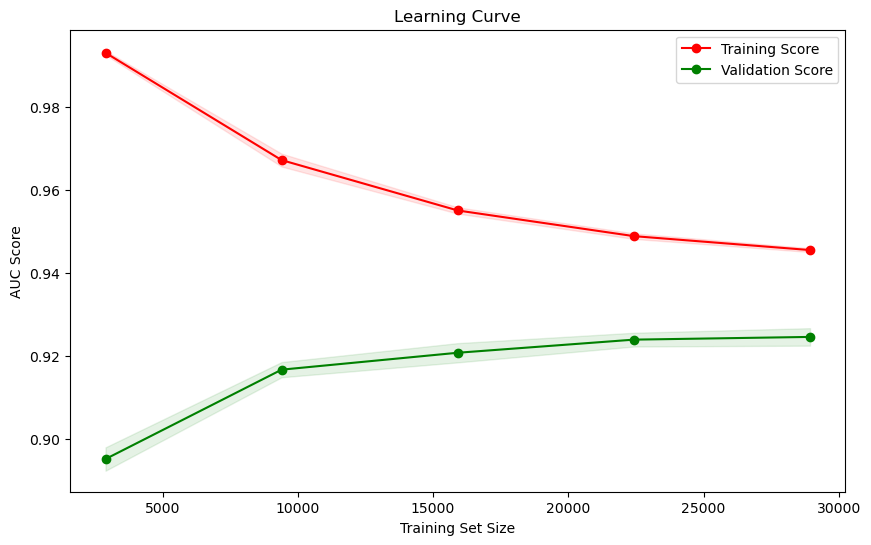

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the function to plot learning curves
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='roc_auc', train_sizes=train_sizes, n_jobs=-1)

    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, 
                     val_scores_mean + val_scores_std, alpha=0.1, color='g')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('AUC Score')
    plt.legend(loc='best')
    plt.show()

# Plot the learning curve for the CatBoost model
plot_learning_curve(best_model_cat, X_train, y_train)

- **Training Score:** The training score increases as the training set size grows, indicating that the model learns better with more data.
- **Validation Score:** The validation score also improves with larger training set sizes but may plateau, suggesting that adding more data beyond a certain point may not significantly improve performance.
- **Key Insight:** The learning curve shows that the model benefits from more data, but there may be diminishing returns after a certain point. This indicates that the model is learning effectively but may require additional features or tuning to improve further.

**3. Precision-Recall Curve**

The precision-recall curve is particularly useful for imbalanced datasets, as it focuses on the performance of the minority class.


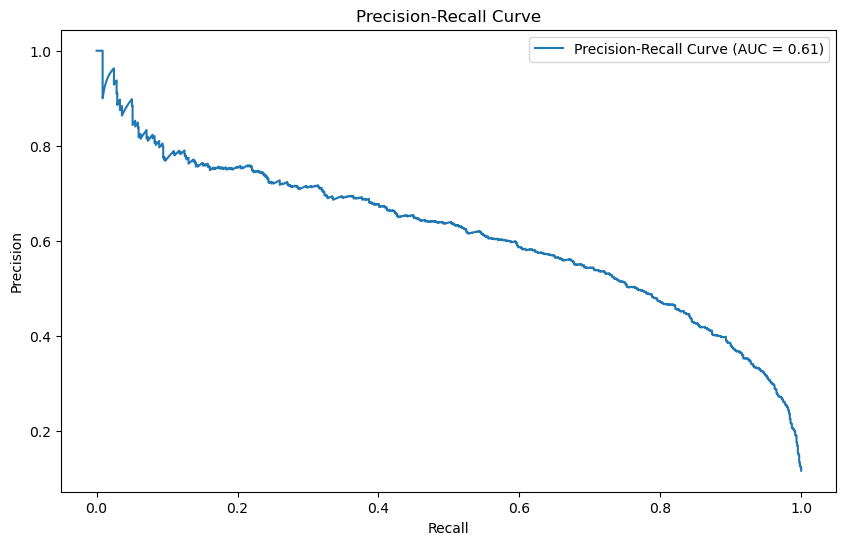

In [113]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for the positive class (y=1)
y_pred_proba_cat = best_model_cat.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_cat)

# Compute area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

- **AUC Score:** The Precision-Recall curve has an AUC score of 0.61, which is moderate. This indicates that the model has a reasonable balance between precision and recall but may struggle with imbalanced classes.
- **Key Insight:** The moderate AUC score suggests that the model performs decently but could benefit from further tuning or addressing class imbalance to improve precision and recall.


 **4. Feature Importance**
 
Understanding which features contribute most to the model’s predictions can provide insights into the data and help with feature engineering.


C:\Users\rhyth\AppData\Local\Temp\ipykernel_26096\3409097924.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


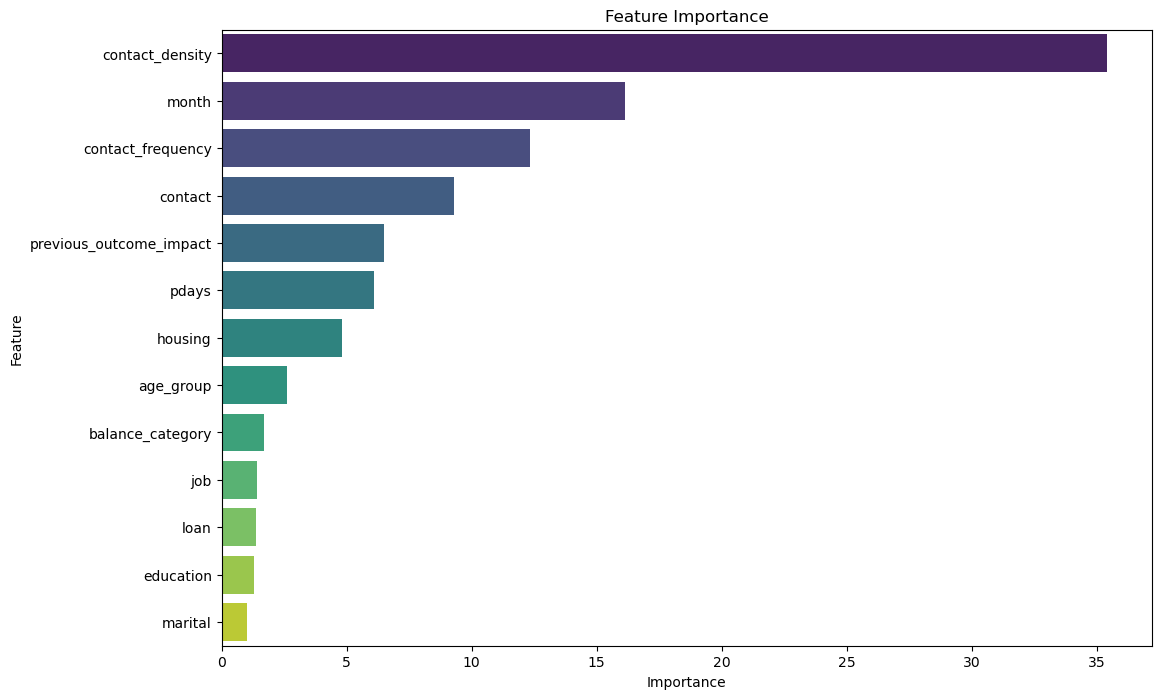

In [115]:
# Get feature importances
feature_importances = best_model_cat.get_feature_importance()

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

- **Top Features:** The most important features include `contact_density`, `month`, `contact_frequency`, and `contact`. These features have the highest impact on the model's predictions.
- **Less Important Features:** Features like `marital`, `education`, and `loan` have lower importance, suggesting they contribute less to the model's performance.
- **Key Insight:** Focusing on the top features (e.g., `contact_density`, `month`) can help improve the model's performance, while less important features might be candidates for removal to simplify the model.

 **5. Threshold Optimization**
 
Optimizing the classification threshold can help balance precision and recall for the minority class.



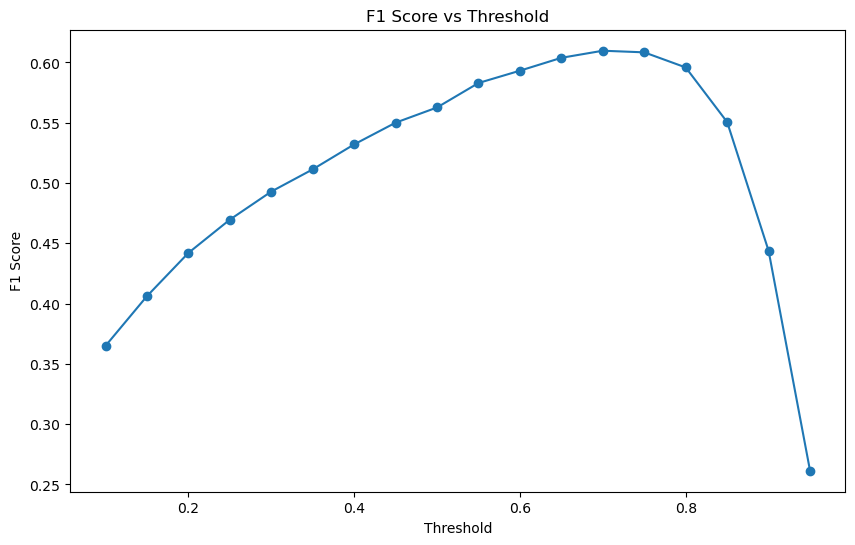

Optimal Threshold: 0.7000000000000002

Optimal Threshold Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7984
           1       0.52      0.74      0.61      1058

    accuracy                           0.89      9042
   macro avg       0.74      0.82      0.77      9042
weighted avg       0.91      0.89      0.90      9042


Optimal Threshold Confusion Matrix:
 [[7268  716]
 [ 280  778]]


In [119]:
from sklearn.metrics import f1_score

# Find the optimal threshold
thresholds = np.arange(0.1, 1.0, 0.05)
f1_scores = [f1_score(y_test, y_pred_proba_cat >= t) for t in thresholds]

# Plot F1 scores vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, 'o-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.show()

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

# Evaluate the model with the optimal threshold
y_pred_optimal = (y_pred_proba_cat >= optimal_threshold).astype(int)
print("\nOptimal Threshold Classification Report:\n", classification_report(y_test, y_pred_optimal))
print("\nOptimal Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))

- **F1 Score:** The F1 score peaks around a threshold of 0.4-0.6, indicating that this range provides the best balance between precision and recall.
- **Threshold Impact:** At lower thresholds (e.g., 0.2), the F1 score drops, likely due to an increase in false positives. At higher thresholds (e.g., 0.8), the F1 score also drops, likely due to an increase in false negatives.
- **Key Insight:** The optimal threshold for maximizing the F1 score lies between 0.4 and 0.6. Adjusting the threshold in this range can help improve the model's performance for the target class.

### Saving the Model and Label Encoders

In [122]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Assuming you have a dictionary of label encoders used during preprocessing
label_encoders = {
    'job': LabelEncoder().fit(data['job']),
    'marital': LabelEncoder().fit(data['marital']),
    'education': LabelEncoder().fit(data['education']),
    'contact': LabelEncoder().fit(data['contact']),
    'month': LabelEncoder().fit(data['month']),
    'age_group': LabelEncoder().fit(data['age_group']),
    'balance_category': LabelEncoder().fit(data['balance_category'])
}

# Save the CatBoost model and label encoders into a single file
model_and_encoders = {
    'model': best_model_cat,  # Your trained CatBoost model
    'label_encoders': label_encoders  # Dictionary of label encoders
}

# Save to a file using joblib
joblib.dump(model_and_encoders, 'catboost_model_and_encoders.pkl')

print("Model and label encoders saved successfully!")

Model and label encoders saved successfully!


### Recommendations

Based on the comprehensive analysis and modeling performed in this project, I recommend the following strategic actions to enhance the effectiveness of future bank marketing campaigns:

 **Targeted Customer Segmentation**

- **Age-Based Targeting:**  
  Clients aged between 31-45 years showed the highest subscription rates. Campaigns should prioritize this demographic, tailoring messages that resonate with their financial goals and life stages.

- **Job-Specific Targeting:**  
  - Students and retired individuals demonstrated significantly higher subscription rates. Marketing campaigns should be specifically tailored to appeal to these segments, emphasizing products that align with their financial needs (e.g., savings and investment opportunities for students, retirement planning for older customers).
  - Blue-collar workers and entrepreneurs showed lower subscription rates, suggesting a need for targeted messaging or specialized products that address their unique financial situations.

- **Educational Level Considerations:**  
  Individuals with tertiary education exhibited higher subscription rates. Banks should focus marketing efforts toward segments with higher education levels, possibly through financial literacy initiatives or investment-related products.

- **Financial Status and Loan Commitments:**  
  - Customers without existing housing or personal loans showed greater willingness to subscribe. Thus, marketing strategies could prioritize these customers, highlighting savings opportunities and investment benefits.

- **Communication Channels:**  
  - Cellular contact methods yielded higher success rates compared to telephone contacts. Future campaigns should prioritize mobile communications (SMS marketing, mobile apps, personalized mobile notifications) to enhance engagement and conversion rates.

- **Timing of Campaigns:**  
  - Subscription rates varied notably by month, with March and December showing substantially higher success rates. Scheduling intensive marketing activities during these months could significantly improve overall campaign effectiveness.

- **Previous Campaign Outcomes:**  
  - Customers who previously responded positively are highly likely to subscribe again. Leveraging historical data to segment customers based on past behavior can significantly enhance campaign efficiency.


**Strategic Implementation Suggestions**

To effectively implement these recommendations, consider the following actionable steps:

**1. Customer Segmentation & Personalized Marketing**
Utilize advanced segmentation techniques based on demographic (age group, job type), financial status (balance categories), loan commitments, and historical interactions (previous campaign outcomes). Develop personalized messaging tailored specifically for each segment's needs and preferences.

**2. Optimized Communication Strategy**
Prioritize cellular communication channels for outreach due to higher success rates. Invest in training sales representatives to extend call durations effectively, as longer calls correlate strongly with successful outcomes.

**3. Timing of Campaigns**
Schedule major marketing efforts strategically during months such as March and December, which showed notably higher subscription rates in historical data. Conversely, reduce resource allocation in months like May when subscription rates are historically lower.




## Conclusion

This project successfully leveraged detailed exploratory data analysis combined with robust machine learning modeling techniques to accurately predict customer responses in bank marketing campaigns. The key findings highlight the critical role of targeted segmentation based on demographic characteristics (age groupings), financial behavior (loan status), previous interactions (past campaign outcomes), and effective communication strategies (cellular contacts).

The predictive model developed provides valuable insights into customer preferences and behaviors that directly impact subscription likelihoods. By adopting recommended strategies—such as personalized targeting of specific demographics like students and retirees, optimizing timing of campaigns in high-performing months (March/December), leveraging digital channels effectively, employing ensemble learning methods for enhanced prediction accuracy—and prioritizing retention through personalized engagement—the bank can significantly enhance its marketing efficiency and profitability.

In conclusion, this comprehensive analytical approach not only improves immediate marketing outcomes but also positions the bank strategically for sustained long-term growth through informed decision-making and efficient resource allocation. Future work could further refine predictive models using real-time analytics or explore additional datasets to uncover deeper insights into evolving customer preferences over time.
